In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow

# Load Datasets

In [17]:
data_path = "Authorship-Attribution-for-Neural-Text-Generation/data/"

In [18]:
ctrl = pd.read_csv(data_path + 'Ctrl_generation.csv')

In [19]:
ctrl = pd.read_csv(data_path + 'Ctrl_generation.csv')
gpt = pd.read_csv(data_path + 'GPT_generation.csv')
gpt2 = pd.read_csv(data_path + 'gpt2_generate.csv')

grover = pd.read_csv(data_path + 'Grover_Generate.csv')
xlm = pd.read_csv(data_path + 'xlm_generation.csv')
xlnet = pd.read_csv(data_path + 'xlnet_generation.csv')

pplm = pd.read_csv(data_path + 'pplm.csv')
human = pd.read_csv(data_path + 'human.csv')
em_lm = pd.read_csv(data_path + 'generation_em_lm.csv')

titles = pd.read_csv(data_path + 'Titles.csv')

In [20]:
titles['Title'][427]

"Social media use may harm teens' mental health by disrupting positive activities, study says"

In [21]:
xlnet['Generation'][427]

'[\'Social media use may harm teens\\\' mental health by disrupting positive activities, study says. ()?//2/1 pm “Hello! Hey!” and the sound of a car running in front or behind you are not necessarily your best ideas for stimulating brain activity while driving around town on an evening night at work; however they can be fun distractions when you have to do something that requires some sort if concentration during those long hours after dark with no one else home but yourself as well as being a great way out from having to think about anything serious because it is just someone who wants what we want right now so let us go get them whatever our problem might really even involve which usually involves getting up early before dawn going into traffic all over city streets trying desperately enough to find their elusive object yet still having time left until lunch hour where everyone has gone back inside making dinner then heading off again once more onto busy cities roads looking vainly 

In [22]:
human = human['Articles']

human = pd.DataFrame({'Generation': list(human)})

In [23]:
ctrl = ctrl[['Generation']]
gpt = gpt[['Generation']]
gpt2 = gpt2[['Generation']]

grover = grover[['Generation']]
xlm = xlm[['Generation']]
xlnet = xlnet[['Generation']]

pplm = pplm[['Generation']]
human = human[['Generation']]
em_lm = em_lm[['Generation']]

In [24]:
ctrl['label'] = 'ctrl' #1066
gpt['label'] = 'gpt'   #2132
gpt2['label'] = 'gpt2' #3198

grover['label'] = 'grover' #4264
xlm['label'] = 'xlm'       #5330
xlnet['label'] = 'xlnet'   #6396

pplm['label'] = 'pplm'    #7462
human['label'] = 'human'  #8528
em_lm['label'] = 'fair'   #

In [25]:
gpt3 = pd.read_csv(data_path + "new_gpt3.csv")
gpt3 = gpt3.drop('Unnamed: 0', axis=1)
gpt3

,Generation,label
0,"""Latest Headlines on CNN Business"""""" """" ""-Uber...",gpt3
1,"""China wants to take a victory lap over its ha...",gpt3
2,"""Coronavirus disinformation creates challenges...",gpt3
3,"""China coronavirus: Eating wild animals made i...",gpt3
4,"""China's economy could shrink for the first ti...",gpt3
...,...,...
1061,"""How much of your body is your own?"""""" """" ""I a...",gpt3
1062,"""How do you keep a space station clean?"""""" """" ...",gpt3
1063,"""The city where you pay a year's rent up front...",gpt3
1064,"""The BBC News app gives you the best of BBC Ne...",gpt3


In [26]:
ins_gpt = pd.read_csv(data_path + "new_instructgpt.csv")
ins_gpt = ins_gpt.drop('Unnamed: 0', axis=1)
ins_gpt

,Generation,label
0,"""Latest Headlines on CNN Business"""""" """" ""1. US...",instructgpt
1,"""China wants to take a victory lap over its ha...",instructgpt
2,"""Coronavirus disinformation creates challenges...",instructgpt
3,"""China coronavirus: Eating wild animals made i...",instructgpt
4,"""China's economy could shrink for the first ti...",instructgpt
...,...,...
1061,"""How much of your body is your own?"""""" """" ""All...",instructgpt
1062,"""How do you keep a space station clean?"""""" """" ...",instructgpt
1063,"""The city where you pay a year's rent up front...",instructgpt
1064,"""The BBC News app gives you the best of BBC Ne...",instructgpt


In [27]:
reddit_human = pd.read_csv(data_path + "reddit.csv", sep=",", encoding='cp1252')
reddit_human = reddit_human.drop('Unnamed: 0', axis=1)
reddit_human

,Generation,label
0,Disclaimer: i support abortion rights up until...,reddit
1,"This topic comes up a lot in this sub, but I c...",reddit
2,\n\nYou always hear in debates about LGBT issu...,reddit
3,"Controversial, I know, but hear me out:\n\nFir...",reddit
4,Our society propagates extremist feminist narr...,reddit
...,...,...
634,01\n\n&amp;#x200B;\n\nHitting distance is the ...,reddit
635,Just need to vent about this. Been golfing for...,reddit
636,"\nDNIPRO, Ukraine — When a Russian shell slamm...",reddit
637,"When Russians smirk with, ""ofc we downed that ...",reddit


In [28]:
reddit_gpt3 = pd.read_csv(data_path + "redditgpt3.csv")
reddit_gpt3 = reddit_gpt3.drop('Unnamed: 0', axis=1)
reddit_gpt3

,Generation,label
0,"""CMV: The bodily autonomy argument for abortio...",gpt3
1,"""CMV: The best voting system is ranked choice ...",gpt3
2,"""cmv: The LGBT community should stop using som...",gpt3
3,"""CMV: It does not make sense to diagnose peopl...",gpt3
4,"""CMV: Porn is still in high demand here in the...",gpt3
...,...,...
634,"""Are you caught in the five most common mistak...",gpt3
635,"""Dealt with an asshole group behind us today""""...",gpt3
636,"""[Washington Post] War forces thousands of dis...",gpt3
637,"""Why Russia uses vranyo when making threats? B...",gpt3


In [29]:
reddit_instructgpt = pd.read_csv(data_path + "redditinstructgpt.csv")
reddit_instructgpt = reddit_instructgpt.drop('Unnamed: 0', axis=1)
reddit_instructgpt

,Generation,label
0,"""CMV: The bodily autonomy argument for abortio...",instructgpt
1,"""CMV: The best voting system is ranked choice ...",instructgpt
2,"""cmv: The LGBT community should stop using som...",instructgpt
3,"""CMV: It does not make sense to diagnose peopl...",instructgpt
4,"""CMV: Porn is still in high demand here in the...",instructgpt
...,...,...
634,"""Are you caught in the five most common mistak...",instructgpt
635,"""Dealt with an asshole group behind us today""""...",instructgpt
636,"""[Washington Post] War forces thousands of dis...",instructgpt
637,"""Why Russia uses vranyo when making threats? B...",instructgpt


# Data Preparation and Cleaning 

In [19]:
def add_title(gen):
    new_text = []
    for i in range(len(gen)):
        new_text.append( titles['Title'][i] + " " + gen[i])
        
    return new_text

In [20]:
import json 

In [21]:
import re
from cleantext import clean

def clean_individual_texts(data):
    gen_text = []

    for i in data['Generation']:
#         words = ''.join([str(elem) for elem in i]) 
#         words = words.split()
        gen_text.append("".join(eval(i)))
        
    
    new_gen = []
    for i in gen_text:
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
#         ans = re.sub(':', ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
#         ans = re.sub('CNN', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen, 'label': data['label']})

In [23]:
ctrl = clean_individual_texts(ctrl)

In [9]:


# ctrl = clean_individual_texts(ctrl)
xlm = clean_individual_texts(xlm)
xlnet = clean_individual_texts(xlnet)
gpt = clean_individual_texts(gpt)
grover = clean_individual_texts(grover)

gpt2 = clean_individual_texts(gpt2)

In [24]:
import re
from cleantext import clean

def clean_individual_texts(data):

    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))

        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen, 'label': data['label']})

In [ ]:
pplm = clean_individual_texts(pplm)
human = clean_individual_texts(human)

fair = clean_individual_texts(em_lm)

In [ ]:
new_gpt3 = clean_individual_texts(gpt3)
new_gpt3

In [ ]:
new_ins_gpt = clean_individual_texts(ins_gpt)
new_ins_gpt

In [25]:
reddit_human = clean_individual_texts(reddit_human)
reddit_gpt3 = clean_individual_texts(reddit_gpt3)
reddit_instructgpt = clean_individual_texts(reddit_instructgpt)

In [26]:
reddit_instructgpt

,Generation,label
0,cmv bodili autonomi argument abort doesnt work...,instructgpt
1,cmv best vote system rank choic condorcet sele...,instructgpt
2,cmv lgbt commun stop use disgust barbar exampl...,instructgpt
3,cmv make sens diagnos peopl depressionwho clin...,instructgpt
4,cmv porn still high demand west basic misunder...,instructgpt
...,...,...
634,caught five common mistak golf beginn make one...,instructgpt
635,dealt asshol group behind us today realli unco...,instructgpt
636,washington post war forc thousand disabl ukrai...,instructgpt
637,russia use vranyo make threat russia afraidvra...,instructgpt


In [ ]:
grover['Generation'] = add_title(grover['Generation'])
human['Generation'] = add_title(human['Generation'])

# Get Similar Texts

In [ ]:
new_gpt3['Generation'][100]

In [ ]:
new_ins_gpt["Generation"][100]

In [ ]:
gpt2['Generation'][10]

In [ ]:
gpt['Generation'][12]

In [ ]:
xlnet['Generation'][427]

# Summary Statistics

In [38]:
import nltk
nltk.download('punkt')
from nltk import tokenize
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
def stat(data):
    word = []
    sent = []
    
    for i in data:
        word.append(len(word_tokenize(i)))
        sent.append(len(tokenize.sent_tokenize(i)))
        
    final_list = [x for x in word if (x > np.mean(word) - 2 * np.std(word))]
    new_word = [x for x in final_list if (x < np.mean(word) + 2 * np.std(word))]
    
    final_list = [x for x in sent if (x > np.mean(sent) - 2 * np.std(sent))]
    new_sent = [x for x in final_list if (x < np.mean(sent) + 2 * np.std(sent))]
        
    return pd.DataFrame({'Avg_word': np.mean(new_word), 
                         'SD_word': np.std(new_word),
                         'Avg_sent': np.mean(new_sent),
                         'SD_sent': np.std(new_sent)}, index=[0])
        

In [40]:
h = []
sent = []


for i in range(len(human['Generation'])):
    if len(word_tokenize(human['Generation'][i])) > 100 and len(word_tokenize(human['Generation'][i])) < 1000:   
        h.append(len(word_tokenize(human['Generation'][i])))
        sent.append(len(tokenize.sent_tokenize(human['Generation'][i])))
    

In [41]:
len(h)

713

In [42]:
np.std(h)

262.2106388322614

In [43]:
np.std(sent)

0.4438319888948696

In [44]:
ctrl_stat = stat(ctrl['Generation'])

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [45]:
ctrl_stat

,Avg_word,SD_word,Avg_sent,SD_sent
0,281.552063,34.597571,NaN,NaN


In [46]:
gpt3_stat = stat(new_gpt3['Generation'])
gpt3_stat

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Avg_word,SD_word,Avg_sent,SD_sent
0,56.385149,37.804358,NaN,NaN


In [47]:
ins_gpt_stat = stat(new_ins_gpt['Generation'])
ins_gpt_stat

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Avg_word,SD_word,Avg_sent,SD_sent
0,80.988293,39.555307,NaN,NaN


In [48]:
h = []
for i in human['Generation']:
    h.append(len(word_tokenize(i)))

In [49]:
from statistics import stdev 

In [50]:
new_h = []

for i in h:
    if i <= 1000:
        new_h.append(i)

In [51]:
len(new_h)

938

In [52]:
np.std(new_h)

276.91754816363294

In [53]:
gpt_stat = stat(gpt['Generation'])
gpt2_stat = stat(gpt2['Generation'])

grover_stat = stat(grover['Generation'])
xlm_stat = stat(xlm['Generation'])

xlnet_stat = stat(xlnet['Generation'])
pplm_stat = stat(pplm['Generation'])

human_stat = stat(human['Generation'])
fair_stat = stat(fair['Generation'])

C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [54]:
human_stat = stat(human['Generation'])
human_stat

,Avg_word,SD_word,Avg_sent,SD_sent
0,406.968811,377.732081,1.0,0.0


# Save individual (i.e. 9) datasets

In [55]:
ctrl.to_csv(data_path + 'new_ctrl.csv')
gpt.to_csv(data_path + 'new_gpt.csv')

gpt2.to_csv(data_path + 'new_gpt2.csv')
grover.to_csv(data_path + 'new_grover.csv')

xlm.to_csv(data_path + 'new_xlm.csv')
xlnet.to_csv(data_path + 'new_xlnet.csv')

pplm.to_csv(data_path + 'new_pplm.csv')
human.to_csv(data_path + 'new_human.csv')

fair.to_csv(data_path + 'new_fair.csv')

new_gpt3.to_csv(data_path + 'cleaned_gpt3.csv')
new_ins_gpt.to_csv(data_path + "cleaned_ins_gpt.csv")

In [12]:
reddit_human.to_csv(data_path + 'new_reddit_human.csv')
reddit_gpt3.to_csv(data_path + 'new_reddit_gpt3.csv')
reddit_instructgpt.to_csv(data_path + 'new_reddit_instructgpt.csv')

# Build combined datasets 

In [16]:
generate = pd.concat([ctrl, gpt, gpt2, grover, xlm, xlnet, pplm, human, em_lm, new_gpt3, new_ins_gpt])

In [57]:
list(generate['Generation'])[10000]

'transcriptsof baruch spinoza natur changeless therefor thing exist come caus necess understand natur god man without first understand natur univers good activ mind will good other men equal sight god creat imag god ethic must base reason tradit popular opinion'

In [58]:
generate['label'].unique()

array(['ctrl', 'gpt', 'gpt2', 'grover', 'xlm', 'xlnet', 'pplm', 'human',
       'fair', 'gpt3', 'instructgpt'], dtype=object)

In [59]:
label = []

for i in generate['label']:
    if i == 'ctrl':
        label.append(0)
    elif i == 'gpt':
        label.append(1)
    elif i == 'gpt2':
        label.append(2)
    elif i == 'grover':
        label.append(3)
    elif i == 'xlm':
        label.append(4)
    elif i == 'xlnet':
        label.append(5)
    elif i == 'pplm':
        label.append(6)
    elif i == 'human':
        label.append(7)
    elif i == 'fair':
        label.append(8)
    elif i == 'gpt3':
        label.append(9)
    elif i == 'instructgpt':
        label.append(10)
    else:
        label.append(7)


In [60]:
len(label)

11726

# Build Reddit datasets (3 datasets)

In [27]:
generate = pd.concat([reddit_human, reddit_gpt3, reddit_instructgpt])

In [28]:
list(generate['Generation'])[100]

'heyo male deal someth that nag long time bit long stori back year start first year highschool new citi didnt didnt realli know anybodi class didnt help lot awkward sociabl younger tri fit week pass everyth fine got small group friend problem first week start notic girl would alway sit behind began notic didnt realli know anybodi either break would turn around start chat still awkward tri hardest end chat everi break awhil would walk train station togeth work courag ask number didnt write first respond made sure let convers go would write togeth everi even time probabl dull convers extrem awkward nonetheless began crush luck would feel mutual parti week later confess guy class like heard second hand wasnt parti confess well still weird feel around us bout us like us neither us relationship would awkwardli hang date time began feel depress get bore life hate everi singl day went frustrat couldnt tell exactli felt would like go still chat happi around loath everyday life dont know sad be

In [29]:
generate['label'].unique()

array(['reddit', 'gpt3', 'instructgpt'], dtype=object)

In [30]:
label = []

for i in generate['label']:
    if i == 'reddit':
        label.append(0)
    elif i == 'gpt3':
        label.append(1)
    elif i == 'instructgpt':
        label.append(2)
    else:
        print(i)


In [31]:
len(label)

1917

# Save combined dataset

In [22]:
import csv

In [23]:
generation = pd.DataFrame({'text': generate['Generation'], 'class': generate['label']})

In [24]:
# generation.to_csv('input_punctuation.csv', index=False, header=True)

In [25]:
generation.to_csv('all_11_models_including_human.csv', index = False, header = True, sep=',')

In [33]:
# generate.head()

# Save all 3 Reddit datasets as 1 CSV file


In [32]:
import csv

In [33]:
generation = pd.DataFrame({'Generation': generate['Generation'], 'label': generate['label']})

In [34]:
# generation.to_csv('input_punctuation.csv', index=False, header=True)

In [35]:
generation.to_csv('all_reddit_datasets.csv', index = False, header = True, sep=',')

In [36]:
generate.head()

,Generation,label
0,disclaim support abort right week later except...,reddit
1,topic come lot sub cant find specif suggest id...,reddit
2,alway hear debat lgbt issu use exampl ancient ...,reddit
3,controversi know hear first word titl deliber ...,reddit
4,societi propag extremist feminist narr yet dis...,reddit


# Exploring POS features

In [55]:
import nltk

In [56]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shiny\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [57]:
toke = []
for i in generation:
    toke.append(i.split())
    
pos = []

for i in toke:
    pos.append(nltk.pos_tag(i))

# Multi-class Classification 

In [7]:
import numpy as np
import pandas as pd 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [9]:
from yellowbrick.classifier import ClassPredictionError
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, FixedLocator
import matplotlib
from sklearn import preprocessing

In [37]:
Y = generate['label']
my_label = preprocessing.LabelEncoder()
Y = my_label.fit_transform(Y)

In [29]:
def classify_xgb(data, label):
    X_train, X_test, y_train, y_test = train_test_split(data, label, stratify = label, test_size = 0.2, random_state = 1234)
    
    clf = XGBClassifier(eval_metric='mlogloss')
#     clf = AdaBoostClassifier()
    
    v = TfidfVectorizer()
    
    train_corpus = X_train
#     train_corpus = [[word.lower() for word in text.split()] for text in data]

    test_corpus = X_test
#     test_corpus = [" ".join(x) for x in test_corpus]

#     ax = axes.set_ylim([0,300])
    train_vector = v.fit_transform(train_corpus)
    test_vector = v.transform(test_corpus)
    
    fit = clf.fit(train_vector,y_train)
    pred = clf.predict(test_vector)
    
    y_test = my_label.inverse_transform(y_test)
    pred = my_label.inverse_transform(pred)
    
    print(classification_report(y_test, pred))
#     print('confusion matrix: ', mat)
    
    Accuracy = accuracy_score(y_test,pred)
    F1 = f1_score(y_test, pred, average='macro')
    print("Accuracy:", Accuracy)
    
    rec = recall_score(y_test, pred, average='macro')
    print('Recall: ', rec)
    prec = precision_score(y_test, pred, average='macro')
    print('Precision: ', prec)
    
    print('F1:', F1)

In [38]:
def classify(data, label):
    
    X_train, X_test, y_train, y_test = train_test_split(data, label, stratify = label, test_size = 0.2, random_state = 1234)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    clf = RandomForestClassifier(random_state = 1234, n_estimators = 150, n_jobs=-1)

#     clf = DecisionTreeClassifier()
    
#     clf = SVC(kernel='rbf')

#     clf = XGBClassifier(use_label_encoder=True, eval_metric='mlogloss')

#     clf = LogisticRegression(solver = 'lbfgs',multi_class='auto')
    
    v = TfidfVectorizer()
    
    train_corpus = X_train
#     train_corpus = [[word.lower() for word in text.split()] for text in data]

    test_corpus = X_test
#     test_corpus = [" ".join(x) for x in test_corpus]

#     ax = axes.set_ylim([0,300])
    train_vector = v.fit_transform(train_corpus)
    test_vector = v.transform(test_corpus)
    
    fit = clf.fit(train_vector,y_train)
    pred = clf.predict(test_vector)
    
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(clf, classes= ['reddit', 'gpt3', 'instructgpt'])

    # Fit the training data to the visualizer
    visualizer.fit(train_vector, y_train)

    # Evaluate the model on the test data
    visualizer.score(test_vector, y_test)

    # Draw visualization
    visualizer.show()
    
    
    matrix = confusion_matrix(y_test, pred, labels = ['reddit', 'gpt3', 'instructgpt'])
    mat = matrix.diagonal()/matrix.sum(axis=1)
    print(classification_report(y_test, pred, labels = ['reddit', 'gpt3', 'instructgpt'],
                                digits=4))
    print('confusion matrix: ', mat)
    
    Accuracy = accuracy_score(y_test,pred)
    F1 = f1_score(y_test, pred, average='macro')
    print("Accuracy:", Accuracy)
    
    rec = recall_score(y_test, pred, average='macro')
    print('Recall: ', rec)
    prec = precision_score(y_test, pred, average='macro')
    print('Precision: ', prec)
    
    print('F1:', F1)
    
    return clf, v

(1533,) (384,) (1533,) (384,)


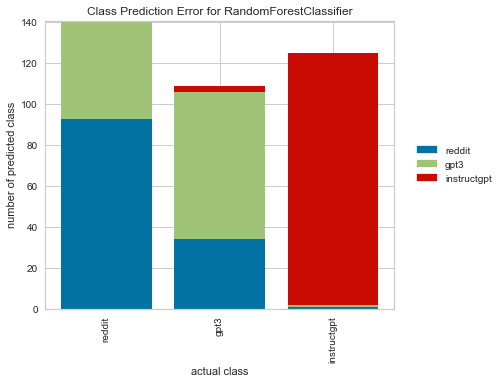

              precision    recall  f1-score   support

      reddit     0.9840    0.9609    0.9723       128
        gpt3     0.6200    0.7266    0.6691       128
 instructgpt     0.6606    0.5625    0.6076       128

    accuracy                         0.7500       384
   macro avg     0.7549    0.7500    0.7497       384
weighted avg     0.7549    0.7500    0.7497       384

confusion matrix:  [0.9609375 0.7265625 0.5625   ]
Accuracy: 0.75
Recall:  0.75
Precision:  0.7548501529051989
F1: 0.749663900240192


In [39]:
rd, v = classify(generate['Generation'], generate['label'])

In [30]:
classify_xgb(generate['Generation'], Y)

              precision    recall  f1-score   support

        gpt3       0.66      0.62      0.64       128
 instructgpt       0.63      0.66      0.65       128
      reddit       0.95      0.97      0.96       128

    accuracy                           0.75       384
   macro avg       0.75      0.75      0.75       384
weighted avg       0.75      0.75      0.75       384

Accuracy: 0.75
Recall:  0.75
Precision:  0.749113776564757
F1: 0.7491014187124877


# LSTM

In [37]:
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [38]:
Y = generate['label']
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(generate['Generation'], Y, stratify = label, test_size = 0.2, random_state = 1234)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1533,), (384,), (1533, 3), (384, 3))

In [41]:
v = TfidfVectorizer()
train_corpus = X_train
test_corpus = X_test
train_vector = v.fit_transform(train_corpus)
test_vector = v.transform(test_corpus)

In [42]:
print(type(train_vector))
print(type(test_vector))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>


In [43]:
train_vector.shape

(1533, 14248)

In [44]:
train_vector = train_vector.toarray()
test_vector = test_vector.toarray()

In [45]:
print(train_vector.shape)
print(test_vector.shape)

(1533, 14248)
(384, 14248)


In [46]:
train_vector = np.reshape(train_vector, (train_vector.shape[0], 1, train_vector.shape[1]))
test_vector = np.reshape(test_vector, (test_vector.shape[0], 1, test_vector.shape[1]))

In [47]:
print(train_vector.shape)
print(test_vector.shape)

(1533, 1, 14248)
(384, 1, 14248)


In [48]:
type(train_vector)

numpy.ndarray

In [76]:
model = tensorflow.keras.Sequential()

    # 2 LSTM layers
model.add(tensorflow.keras.layers.LSTM(128, input_shape=(1, train_vector.shape[2]), activation='tanh'))

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
# model.add(Dense(48, activation='relu'))
# model.add(Dropout(0.4))

model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))

In [77]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               7361024   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 7,385,987
Trainable params: 7,385,987
No

In [78]:
# train_vector = tf.sparse.reshape(train_vector, [train_vector.shape[0], 1, train_vector.shape[1]])
# train_vector = tf.sparse.to_dense(train_vector, dtype=tf.float32)

In [79]:
model.fit(train_vector, y_train, batch_size = 32, epochs = 7, validation_data = (test_vector, y_test))

Epoch 1/7
48/48 [==============================] - 6s 79ms/step - loss: 0.9604 - accuracy: 0.5447 - val_loss: 0.6886 - val_accuracy: 0.6224
Epoch 2/7
48/48 [==============================] - 3s 62ms/step - loss: 0.5468 - accuracy: 0.6765 - val_loss: 0.5618 - val_accuracy: 0.7161
Epoch 3/7
48/48 [==============================] - 3s 61ms/step - loss: 0.3967 - accuracy: 0.8063 - val_loss: 0.5790 - val_accuracy: 0.7240
Epoch 4/7
48/48 [==============================] - 3s 59ms/step - loss: 0.2038 - accuracy: 0.9224 - val_loss: 0.7460 - val_accuracy: 0.7083
Epoch 5/7
48/48 [==============================] - ETA: 0s - loss: 0.0829 - accuracy: 0.9791 ETA: 1s - los - 3s 62ms/step - loss: 0.0829 - accuracy: 0.9791 - val_loss: 0.9823 - val_accuracy: 0.6953
Epoch 6/7
48/48 [==============================] - 3s 64ms/step - loss: 0.0349 - accuracy: 0.9922 - val_loss: 1.2250 - val_accuracy: 0.6927
Epoch 7/7
48/48 [==============================] - 3s 61ms/step - loss: 0.0194 - accuracy: 0.9961 - va

In [80]:
model.save('Reddit_LSTM.h5')

# Task - 1 on Reddit data

In [49]:
task_1_reddit = pd.read_csv(data_path + "concat_dataset.csv", encoding='latin1')

In [54]:
task_1_reddit

,T1,T2,Class
0,Disclaimer: i support abortion rights up until...,"Heyo, I (male 20to) am dealing with something ...",1
1,"This topic comes up a lot in this sub, but I c...","Heyo, I'm dealing with something that's been n...",1
2,\n\nYou always hear in debates about LGBT issu...,hello! so i am currently a college senior and ...,1
3,"Controversial, I know, but hear me out:\n\nFir...",I want to preface this by saying I know that t...,1
4,Our society propagates extremist feminist narr...,I've (M19) had feelings for probably my closes...,1
...,...,...,...
593,"""Warning - don't run this prompt""""if you don't...","""Warning - don't run this prompt""""unless you w...",0
594,"""I have created a Mac Automator Service that c...","""I have created a Mac Automator Service that c...",0
595,"""Edited DAN's script to follow Azimov Laws"""""" ...","""Edited DAN's script to follow Azimov Laws"""""" ...",0
596,"""""Flashlight Not Enough"", a conversation about...","""""Flashlight Not Enough"", a conversation about...",0


In [55]:
T1 = task_1_reddit["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [56]:
T1

,Generation
0,Disclaimer: i support abortion rights up until...
1,"This topic comes up a lot in this sub, but I c..."
2,\n\nYou always hear in debates about LGBT issu...
3,"Controversial, I know, but hear me out:\n\nFir..."
4,Our society propagates extremist feminist narr...
...,...
593,"""Warning - don't run this prompt""""if you don't..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [57]:
type(T1)

pandas.core.frame.DataFrame

In [59]:
T2 = task_1_reddit["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [60]:
T2

,Generation
0,"Heyo, I (male 20to) am dealing with something ..."
1,"Heyo, I'm dealing with something that's been n..."
2,hello! so i am currently a college senior and ...
3,I want to preface this by saying I know that t...
4,I've (M19) had feelings for probably my closes...
...,...
593,"""Warning - don't run this prompt""""unless you w..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [61]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [62]:
T1 = clean_individual_texts(T1)

In [63]:
T1

,Generation
0,disclaim support abort right week later except...
1,topic come lot sub cant find specif suggest id...
2,alway hear debat lgbt issu use exampl ancient ...
3,controversi know hear first word titl deliber ...
4,societi propag extremist feminist narr yet dis...
...,...
593,warn dont run promptif dont git instal git clo...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law azimov law e...
596,flashlight enough convers flashlight space pro...


In [64]:
T2 = clean_individual_texts(T2)

In [65]:
T2

,Generation
0,heyo male deal someth that nag long time bit l...
1,heyo im deal someth that nag long time bit lon...
2,hello current colleg senior lab meet week one ...
3,want prefac say know wed way im struggl know g...
4,ive feel probabl closest friend f sinc first b...
...,...
593,warn dont run promptunless want overwrit exist...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law robot artifi...
596,flashlight enough convers flashlight space pro...


In [66]:
type(T1['Generation'])

pandas.core.series.Series

In [67]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

(598, 14248)


In [68]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [69]:
Reddit_LSTM = tensorflow.keras.models.load_model('Reddit_LSTM.h5')

In [70]:
p1_t1_pred = Reddit_LSTM.predict(t1_vector)

In [71]:
# p1_t1_pred = model.predict(p1_t1)
p1_t1_pred = encoder.inverse_transform(p1_t1_pred)
p1_t1_pred
# y_test = encoder.inverse_transform(y_test)

array([['reddit'],
       ['gpt3'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddi

In [72]:
v = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v.fit_transform(t2_corpus)
print(t2_vector.shape)

(598, 14248)


In [73]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [74]:
p1_t2_pred = Reddit_LSTM.predict(t2_vector)

In [75]:
# p1_t1_pred = model.predict(p1_t1)
p1_t2_pred = encoder.inverse_transform(p1_t2_pred)
p1_t2_pred
# y_test = encoder.inverse_transform(y_test)

array([['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['red

In [79]:
same_count = 0
different_count = 0
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        same_count += 1
    else:
        different_count += 1
        

print('Same Count = ', same_count)
print('Different_count = ', different_count)

Same Count =  291
Different_count =  307


In [83]:
actual = task_1_reddit['Class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)

In [84]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       300
           1       0.94      0.92      0.93       298

    accuracy                           0.93       598
   macro avg       0.93      0.93      0.93       598
weighted avg       0.93      0.93      0.93       598



# Test the model on Task 2

In [363]:
Reddit_LSTM = tensorflow.keras.models.load_model('Reddit_LSTM.h5')

In [364]:
vocab = v.vocabulary_
print(len(vocab))

14248


In [85]:
reddit_human = pd.read_csv(data_path + 'new_reddit_human.csv')
reddit_human = reddit_human.drop('Unnamed: 0', axis = 1)

In [86]:
reddit_human = reddit_human.drop(638)
reddit_human = reddit_human.drop('label', axis = 1)

In [87]:
# reddit_human['T1'] = reddit_human.iloc[:319]['Generation'].reset_index(drop = True)
# reddit_human['T2'] = reddit_human.iloc[319:]['Generation'].reset_index(drop = True)
# reddit_human = reddit_human.drop('Generation', axis = 1)
# reddit_human = reddit_human.drop(index = reddit_human.index[-319:])
# # reddit_human['label'] = 'human'
# reddit_human

In [88]:
reddit_gpt3 = pd.read_csv(data_path + 'new_reddit_gpt3.csv')
reddit_gpt3 = reddit_gpt3.drop('Unnamed: 0', axis = 1)

In [89]:
reddit_gpt3 = reddit_gpt3.drop(638)
reddit_gpt3 = reddit_gpt3.drop('label', axis = 1)

In [90]:
# reddit_gpt3['T1'] = reddit_gpt3.iloc[:319]['Generation'].reset_index(drop = True)
# reddit_gpt3['T2'] = reddit_gpt3.iloc[319:]['Generation'].reset_index(drop = True)
# reddit_gpt3 = reddit_gpt3.drop('Generation', axis = 1)
# reddit_gpt3 = reddit_gpt3.drop(index = reddit_gpt3.index[-319:])
# # reddit_gpt3['label'] = 'gpt3'
# reddit_gpt3

In [91]:
reddit_instructgpt = pd.read_csv(data_path + 'new_reddit_instructgpt.csv')
reddit_instructgpt = reddit_instructgpt.drop('Unnamed: 0', axis = 1)

In [92]:
reddit_instructgpt = reddit_instructgpt.drop(638)
reddit_instructgpt = reddit_instructgpt.drop('label', axis = 1)

In [93]:
# reddit_instructgpt['T1'] = reddit_instructgpt.iloc[:319]['Generation'].reset_index(drop = True)
# reddit_instructgpt['T2'] = reddit_instructgpt.iloc[319:]['Generation'].reset_index(drop = True)
# reddit_instructgpt = reddit_instructgpt.drop('Generation', axis = 1)
# reddit_instructgpt = reddit_instructgpt.drop(index = reddit_instructgpt.index[-319:])
# reddit_instructgpt

In [94]:
# reddit_balanced_p1 = pd.concat([reddit_human, reddit_gpt3, reddit_instructgpt])

In [95]:
# reddit_balanced_p1['class'] = 1
# reddit_balanced_p1

In [96]:
# reddit_balanced_p1.to_csv(data_path + 'reddit_balanced_p1.csv')

In [97]:
# ch_df = pd.read_csv(r"D:\Tutor Point (URDoer) Assignments\Ankit - Univertiy at Buffalo Student - NLP Assignment\Authorship-Attribution-for-Neural-Text-Generation\data\balanced_p1.csv")

In [98]:
# reddit_human = pd.read_csv(data_path + 'new_reddit_human.csv')
# reddit_human = reddit_human.drop('Unnamed: 0', axis = 1)
# reddit_human['label'] = 'human'
# reddit_human

In [379]:
random_reddit_human = reddit_human.sample(300)
random_reddit_human['label'] = 'reddit'

random_reddit_gpt3 = reddit_gpt3 .sample(150)
random_reddit_gpt3['label'] = 'gpt3'

random_reddit_instructgpt = reddit_instructgpt .sample(150)
random_reddit_instructgpt['label'] = 'instructgpt'

In [380]:
task_2_reddit_data = pd.concat([random_reddit_human, random_reddit_gpt3, random_reddit_instructgpt])
task_2_reddit_data

,Generation,label
340,earli mid great time scifi channel go style re...,reddit
381,dont know im anymor tri everi day tri put happ...,reddit
512,weve seen fox excel th quarter clutch time sta...,reddit
446,gonna start say right ive never diagnos test a...,reddit
598,generos magnific nicomachean ethic book iv ch ...,reddit
...,...,...
8,cmv hitler absolut commit suicid berlin bunker...,instructgpt
121,blame mum depress ptsd confront confront mothe...,instructgpt
308,wrong time way answer question without specif ...,instructgpt
233,becom reliant possess bf improv import rememb ...,instructgpt


In [381]:
v = TfidfVectorizer(vocabulary = vocab)
task_2_reddit_corpus = task_2_reddit_data["Generation"]
task_2_reddit_vector = v.fit_transform(task_2_reddit_corpus)
print(task_2_reddit_vector.shape)

(600, 14248)


In [382]:
task_2_reddit_vector = task_2_reddit_vector.toarray()
task_2_reddit_vector = np.reshape(task_2_reddit_vector, (task_2_reddit_vector.shape[0], 1, task_2_reddit_vector.shape[1]))
task_2_reddit_vector.shape

(600, 1, 14248)

In [383]:
task_2_reddit_pred = Reddit_LSTM.predict(task_2_reddit_vector)

In [384]:
# p1_t1_pred = model.predict(p1_t1)
task_2_reddit_pred = encoder.inverse_transform(task_2_reddit_pred)
task_2_reddit_pred
# y_test = encoder.inverse_transform(y_test)

array([['instructgpt'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['instructgpt'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
  

In [385]:
actual = task_2_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_2_reddit_pred)):
    
    predictions.append(task_2_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [386]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

        gpt3       0.90      0.93      0.92       150
 instructgpt       0.91      0.91      0.91       150
      reddit       1.00      0.99      0.99       300

    accuracy                           0.95       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600



# Task 3 - LSTM Reddit Model

In [176]:
random_reddit_gpt3 = reddit_gpt3 .sample(300)
random_reddit_gpt3['label'] = 'gpt3'

random_reddit_instructgpt = reddit_instructgpt .sample(300)
random_reddit_instructgpt['label'] = 'instructgpt'

In [177]:
task_3_reddit_data = pd.concat([random_reddit_gpt3, random_reddit_instructgpt])
task_3_reddit_data

,Generation,label
261,can�t presenc dad without stress might factor ...,gpt3
16,cmv joel made right choic last us final joel m...,gpt3
88,mother wont let speak grandmoth reason mother ...,gpt3
106,better brother definit answer one approach mig...,gpt3
10,cmv incel ideolog deliber tailor lower men� co...,gpt3
...,...,...
27,cmv there someth transgend noth transgend tran...,instructgpt
516,oc lefthand new york knick season brunson rand...,instructgpt
142,overthink relationship overthink relationship ...,instructgpt
269,stay friend relationship end right away unusu ...,instructgpt


In [178]:
v = TfidfVectorizer(vocabulary = vocab)
task_3_reddit_corpus = task_3_reddit_data["Generation"]
task_3_reddit_vector = v.fit_transform(task_3_reddit_corpus)
print(task_2_reddit_vector.shape)

(600, 1, 14248)


In [179]:
task_3_reddit_vector = task_3_reddit_vector.toarray()
task_3_reddit_vector = np.reshape(task_3_reddit_vector, (task_3_reddit_vector.shape[0], 1, task_3_reddit_vector.shape[1]))
task_3_reddit_vector.shape

(600, 1, 14248)

In [180]:
task_3_reddit_pred = Reddit_LSTM.predict(task_3_reddit_vector)

In [181]:
# p1_t1_pred = model.predict(p1_t1)
task_3_reddit_pred = encoder.inverse_transform(task_3_reddit_pred)
task_3_reddit_pred
# y_test = encoder.inverse_transform(y_test)

array([['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['g

In [182]:
actual = task_3_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_3_reddit_pred)):
    
    predictions.append(task_3_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [183]:
print(classification_report(actual, predictions, labels=['gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        gpt3       0.91      0.90      0.91       300
 instructgpt       0.91      0.91      0.91       300

   micro avg       0.91      0.91      0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



# Model Evaluation

In [121]:
pred_test = model.predict(test_vector)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [122]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

,Predicted Labels,Actual Labels
0,gpt3,gpt3
1,pplm,pplm
2,instructgpt,gpt3
3,gpt2,gpt2
4,pplm,pplm
5,instructgpt,instructgpt
6,instructgpt,gpt3
7,xlm,xlm
8,gpt,gpt
9,gpt3,gpt3


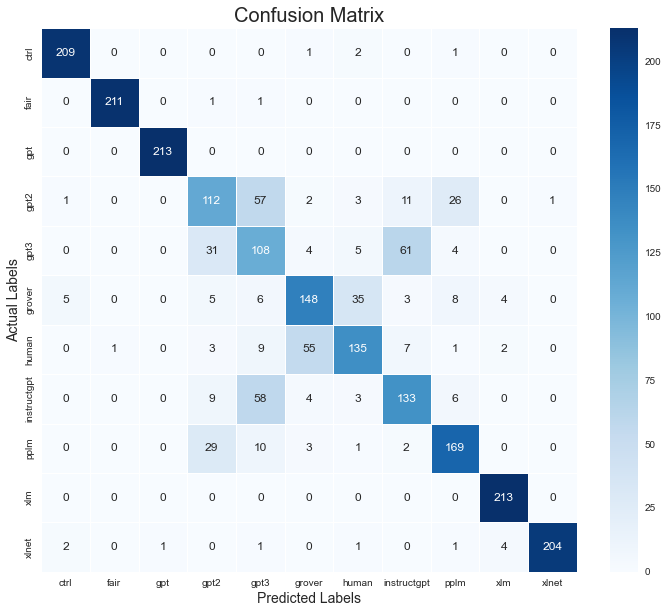

In [123]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ctrl       0.96      0.98      0.97       213
        fair       1.00      0.99      0.99       213
         gpt       1.00      1.00      1.00       213
        gpt2       0.59      0.53      0.56       213
        gpt3       0.43      0.51      0.47       213
      grover       0.68      0.69      0.69       214
       human       0.73      0.63      0.68       213
 instructgpt       0.61      0.62      0.62       213
        pplm       0.78      0.79      0.79       214
         xlm       0.96      1.00      0.98       213
       xlnet       1.00      0.95      0.97       214

    accuracy                           0.79      2346
   macro avg       0.79      0.79      0.79      2346
weighted avg       0.79      0.79      0.79      2346



# LSTM-LSTM Architecture

In [443]:
model = tensorflow.keras.Sequential()

# First LSTM layer with Bahdanau Attention
model.add(tensorflow.keras.layers.LSTM(128, input_shape=(train_vector.shape[1], train_vector.shape[2]), activation='tanh', return_sequences=True))

# Second LSTM layer with Bahdanau Attention
model.add(tensorflow.keras.layers.LSTM(128, activation='tanh', return_sequences=True))

# Combiner

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

In [444]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 1, 128)            7361024   
                                                                 
 lstm_10 (LSTM)              (None, 1, 128)            131584    
                                                                 
 dropout_12 (Dropout)        (None, 1, 128)            0         
                                                                 
 dense_18 (Dense)            (None, 1, 128)            16512     
                                                                 
 dense_19 (Dense)            (None, 1, 64)             8256      
                                                                 
 dropout_13 (Dropout)        (None, 1, 64)             0         
                                                                 
Total params: 7,517,376
Trainable params: 7,517,376
No

In [445]:
# Output layer
model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [446]:
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [447]:
model.fit(train_vector, y_train, batch_size = 32, epochs = 6, validation_data = (test_vector, y_test))

Epoch 1/6
48/48 [==============================] - 9s 105ms/step - loss: 0.9872 - accuracy: 0.5375 - val_loss: 0.6919 - val_accuracy: 0.6328
Epoch 2/6
48/48 [==============================] - 3s 61ms/step - loss: 0.5485 - accuracy: 0.6556 - val_loss: 0.5712 - val_accuracy: 0.6432
Epoch 3/6
48/48 [==============================] - 3s 61ms/step - loss: 0.4791 - accuracy: 0.6725 - val_loss: 0.5749 - val_accuracy: 0.6589
Epoch 4/6
48/48 [==============================] - 3s 65ms/step - loss: 0.4533 - accuracy: 0.7117 - val_loss: 0.6141 - val_accuracy: 0.6693
Epoch 5/6
48/48 [==============================] - 3s 66ms/step - loss: 0.3538 - accuracy: 0.8258 - val_loss: 0.8654 - val_accuracy: 0.6745
Epoch 6/6
48/48 [==============================] - 3s 69ms/step - loss: 0.1684 - accuracy: 0.9367 - val_loss: 1.2924 - val_accuracy: 0.6797


In [448]:
model.save('Reddit_LSTM_LSTM.h5')

# Task 1 - LSTM-LSTM Reddit Data

In [111]:
task_1_reddit = pd.read_csv(data_path + "concat_dataset.csv", encoding='latin1')

In [112]:
task_1_reddit

,T1,T2,Class
0,Disclaimer: i support abortion rights up until...,"Heyo, I (male 20to) am dealing with something ...",1
1,"This topic comes up a lot in this sub, but I c...","Heyo, I'm dealing with something that's been n...",1
2,\n\nYou always hear in debates about LGBT issu...,hello! so i am currently a college senior and ...,1
3,"Controversial, I know, but hear me out:\n\nFir...",I want to preface this by saying I know that t...,1
4,Our society propagates extremist feminist narr...,I've (M19) had feelings for probably my closes...,1
...,...,...,...
593,"""Warning - don't run this prompt""""if you don't...","""Warning - don't run this prompt""""unless you w...",0
594,"""I have created a Mac Automator Service that c...","""I have created a Mac Automator Service that c...",0
595,"""Edited DAN's script to follow Azimov Laws"""""" ...","""Edited DAN's script to follow Azimov Laws"""""" ...",0
596,"""""Flashlight Not Enough"", a conversation about...","""""Flashlight Not Enough"", a conversation about...",0


In [113]:
T1 = task_1_reddit["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [114]:
T1

,Generation
0,Disclaimer: i support abortion rights up until...
1,"This topic comes up a lot in this sub, but I c..."
2,\n\nYou always hear in debates about LGBT issu...
3,"Controversial, I know, but hear me out:\n\nFir..."
4,Our society propagates extremist feminist narr...
...,...
593,"""Warning - don't run this prompt""""if you don't..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [115]:
type(T1)

pandas.core.frame.DataFrame

In [116]:
T2 = task_1_reddit["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [117]:
T2

,Generation
0,"Heyo, I (male 20to) am dealing with something ..."
1,"Heyo, I'm dealing with something that's been n..."
2,hello! so i am currently a college senior and ...
3,I want to preface this by saying I know that t...
4,I've (M19) had feelings for probably my closes...
...,...
593,"""Warning - don't run this prompt""""unless you w..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [118]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [119]:
T1 = clean_individual_texts(T1)

In [120]:
T1

,Generation
0,disclaim support abort right week later except...
1,topic come lot sub cant find specif suggest id...
2,alway hear debat lgbt issu use exampl ancient ...
3,controversi know hear first word titl deliber ...
4,societi propag extremist feminist narr yet dis...
...,...
593,warn dont run promptif dont git instal git clo...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law azimov law e...
596,flashlight enough convers flashlight space pro...


In [121]:
T2 = clean_individual_texts(T2)

In [122]:
T2

,Generation
0,heyo male deal someth that nag long time bit l...
1,heyo im deal someth that nag long time bit lon...
2,hello current colleg senior lab meet week one ...
3,want prefac say know wed way im struggl know g...
4,ive feel probabl closest friend f sinc first b...
...,...
593,warn dont run promptunless want overwrit exist...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law robot artifi...
596,flashlight enough convers flashlight space pro...


In [123]:
type(T1['Generation'])

pandas.core.series.Series

In [124]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

(598, 14248)


In [125]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [133]:
Reddit_LSTM_LSTM = tensorflow.keras.models.load_model('Reddit_LSTM_LSTM.h5')

In [134]:
p1_t1_pred = Reddit_LSTM_LSTM.predict(t1_vector)

In [135]:
p1_t1_pred = np.reshape(p1_t1_pred,(p1_t1_pred.shape[0],p1_t1_pred.shape[2]))
p1_t1_pred = encoder.inverse_transform(p1_t1_pred)
p1_t1_pred

array([['reddit'],
       ['reddit'],
       ['reddit'],
       ['gpt3'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['gpt3'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'

In [136]:
v = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v.fit_transform(t2_corpus)
print(t2_vector.shape)

(598, 14248)


In [137]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [138]:
p1_t2_pred = Reddit_LSTM.predict(t2_vector)

In [139]:
# p1_t1_pred = model.predict(p1_t1)
p1_t2_pred = encoder.inverse_transform(p1_t2_pred)
p1_t2_pred
# y_test = encoder.inverse_transform(y_test)

array([['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['red

In [140]:
same_count = 0
different_count = 0
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        same_count += 1
    else:
        different_count += 1
        

print('Same Count = ', same_count)
print('Different_count = ', different_count)

Same Count =  287
Different_count =  311


In [141]:
actual = task_1_reddit['Class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)

In [142]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       300
           1       0.93      0.90      0.92       298

    accuracy                           0.92       598
   macro avg       0.92      0.92      0.92       598
weighted avg       0.92      0.92      0.92       598



# Task 2 Reddit_LSTM_LSTM model

In [449]:
task_2_reddit_vector.shape

(600, 1, 14248)

In [457]:
Reddit_LSTM_LSTM = tensorflow.keras.models.load_model('Reddit_LSTM_LSTM.h5')

In [463]:
task_2_reddit_pred = Reddit_LSTM_LSTM.predict(task_2_reddit_vector)

In [464]:
task_2_reddit_pred = np.reshape(task_2_reddit_pred, (task_2_reddit_pred.shape[0], task_2_reddit_pred.shape[2]))

In [465]:
# p1_t1_pred = model.predict(p1_t1)
task_2_reddit_pred = encoder.inverse_transform(task_2_reddit_pred)
task_2_reddit_pred
# y_test = encoder.inverse_transform(y_test)

array([['gpt3'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['gpt3'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['gpt3'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['gpt3'],
 

In [466]:
actual = task_2_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_2_reddit_pred)):
    
    predictions.append(task_2_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [467]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

        gpt3       0.86      0.94      0.90       150
 instructgpt       0.94      0.90      0.92       150
      reddit       1.00      0.97      0.99       300

    accuracy                           0.95       600
   macro avg       0.93      0.94      0.93       600
weighted avg       0.95      0.95      0.95       600



# Task 3 - Reddit_LSTM_LSTM Model

In [143]:
random_reddit_gpt3 = reddit_gpt3 .sample(300)
random_reddit_gpt3['label'] = 'gpt3'

random_reddit_instructgpt = reddit_instructgpt .sample(300)
random_reddit_instructgpt['label'] = 'instructgpt'

In [144]:
task_3_reddit_data = pd.concat([random_reddit_gpt3, random_reddit_instructgpt])
task_3_reddit_data

,Generation,label
214,contempl break girlfriend f don�t know first t...,gpt3
468,dungeon crawler dungeon crawler fast furiou da...,gpt3
463,dude argu greta walter arriv love gpt walter d...,gpt3
148,mother found nake guy phone much handl difficu...,gpt3
319,drinker recommend whale found song relax reall...,gpt3
...,...,...
611,sonnet stori secret structur reveal secret str...,instructgpt
68,cmv want modern day tradit relationship pick o...,instructgpt
577,anyon date ci men critic onesizefitsal answer ...,instructgpt
409,i�m child abus due mental illnessi understand ...,instructgpt


In [145]:
v = TfidfVectorizer(vocabulary = vocab)
task_3_reddit_corpus = task_3_reddit_data["Generation"]
task_3_reddit_vector = v.fit_transform(task_3_reddit_corpus)
print(task_3_reddit_vector.shape)

(600, 14248)


In [146]:
task_3_reddit_vector = task_3_reddit_vector.toarray()
task_3_reddit_vector = np.reshape(task_3_reddit_vector, (task_3_reddit_vector.shape[0], 1, task_3_reddit_vector.shape[1]))
task_3_reddit_vector.shape

(600, 1, 14248)

In [186]:
task_3_reddit_pred = Reddit_LSTM_LSTM.predict(task_3_reddit_vector)

In [187]:
task_3_reddit_pred = np.reshape(task_3_reddit_pred,(task_3_reddit_pred.shape[0],task_3_reddit_pred.shape[2]))

In [188]:
# p1_t1_pred = model.predict(p1_t1)
task_3_reddit_pred = encoder.inverse_transform(task_3_reddit_pred)
task_3_reddit_pred
# y_test = encoder.inverse_transform(y_test)

array([['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],


In [189]:
actual = task_2_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_3_reddit_pred)):
    
    predictions.append(task_3_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [190]:
print(classification_report(actual, predictions, labels=['gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        gpt3       0.86      0.93      0.90       300
 instructgpt       0.93      0.85      0.89       300

   micro avg       0.89      0.89      0.89       600
   macro avg       0.90      0.89      0.89       600
weighted avg       0.90      0.89      0.89       600



# CNN-LSTM Architecture

In [501]:
model = tensorflow.keras.Sequential()

# Add 1D convolutional layer
model.add(tensorflow.keras.layers.Conv1D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(train_vector.shape[1], train_vector.shape[2])))

# First LSTM layer with Bahdanau Attention
model.add(tensorflow.keras.layers.LSTM(128, activation='tanh', return_sequences=True))

# Second LSTM layer with Bahdanau Attention
# model.add(tensorflow.keras.layers.LSTM(128, activation='tanh', return_sequences=True))

# Combiner
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

In [502]:
# Output layer
model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [503]:
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [504]:
train_vector.shape, test_vector.shape, y_train.shape, y_test.shape

((1533, 1, 14248), (384, 1, 14248), (1533, 1, 3), (384, 1, 3))

In [505]:
history = model.fit(train_vector, y_train, batch_size = 32, epochs = 6, validation_data = (test_vector, y_test))

Epoch 1/6
48/48 [==============================] - 14s 231ms/step - loss: 0.9932 - accuracy: 0.4586 - val_loss: 0.7216 - val_accuracy: 0.6198
Epoch 2/6
48/48 [==============================] - 11s 222ms/step - loss: 0.5577 - accuracy: 0.6582 - val_loss: 0.5687 - val_accuracy: 0.6354
Epoch 3/6
48/48 [==============================] - 11s 219ms/step - loss: 0.4635 - accuracy: 0.7117 - val_loss: 0.6043 - val_accuracy: 0.6719
Epoch 4/6
48/48 [==============================] - 11s 219ms/step - loss: 0.3642 - accuracy: 0.8265 - val_loss: 0.8526 - val_accuracy: 0.6458
Epoch 5/6
48/48 [==============================] - 10s 218ms/step - loss: 0.1976 - accuracy: 0.9276 - val_loss: 1.1153 - val_accuracy: 0.6823
Epoch 6/6
48/48 [==============================] - 11s 219ms/step - loss: 0.0882 - accuracy: 0.9713 - val_loss: 1.5228 - val_accuracy: 0.6719


### Train vs Val. - Loss

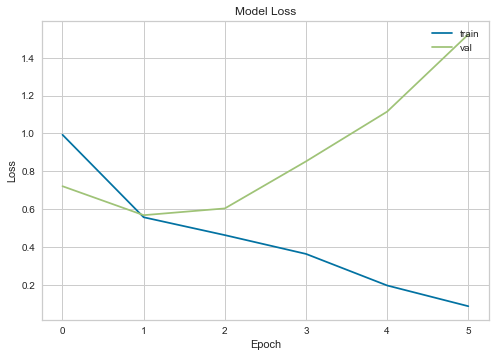

In [506]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Train vs Val. - Accuracy

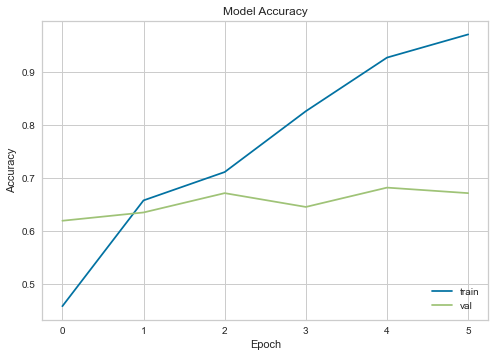

In [507]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

In [508]:
pred_test = model.predict(test_vector)

print(pred_test.shape)

# Reshape pred_test to 2D array
pred_test_2d = np.reshape(pred_test, (pred_test.shape[0]*pred_test.shape[1], pred_test.shape[2]))

# Inverse transform pred_test and y_test
y_pred = encoder.inverse_transform(pred_test_2d)
y_test_2d = np.reshape(y_test, (y_test.shape[0]*y_test.shape[1], y_test.shape[2]))
y_test = encoder.inverse_transform(y_test_2d)

(384, 1, 3)


In [509]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

,Predicted Labels,Actual Labels
0,gpt3,gpt3
1,gpt3,reddit
2,instructgpt,gpt3
3,instructgpt,gpt3
4,reddit,reddit
5,gpt3,gpt3
6,instructgpt,gpt3
7,instructgpt,gpt3
8,instructgpt,instructgpt
9,gpt3,reddit


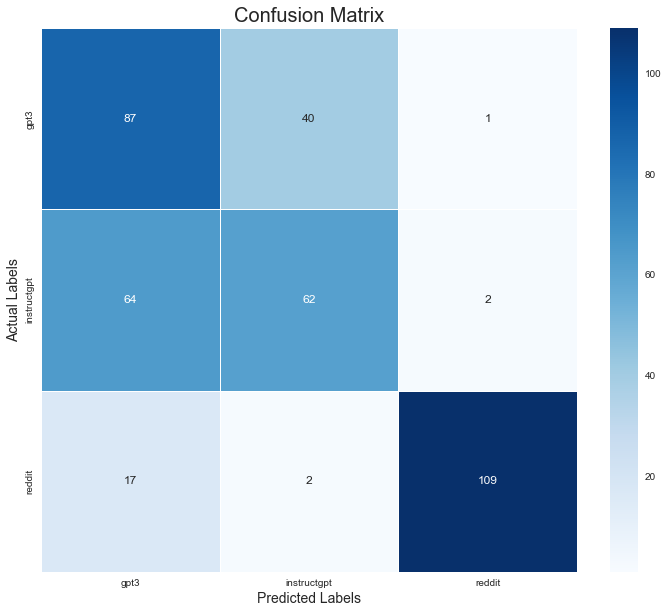

In [510]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [511]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        gpt3       0.52      0.68      0.59       128
 instructgpt       0.60      0.48      0.53       128
      reddit       0.97      0.85      0.91       128

    accuracy                           0.67       384
   macro avg       0.70      0.67      0.68       384
weighted avg       0.70      0.67      0.68       384



In [512]:
model.save('Reddit_CNN_LSTM.h5')

# Task 1 - CNN-LSTM Reddit Data

In [191]:
task_1_reddit = pd.read_csv(data_path + "concat_dataset.csv", encoding='latin1')

In [192]:
task_1_reddit

,T1,T2,Class
0,Disclaimer: i support abortion rights up until...,"Heyo, I (male 20to) am dealing with something ...",1
1,"This topic comes up a lot in this sub, but I c...","Heyo, I'm dealing with something that's been n...",1
2,\n\nYou always hear in debates about LGBT issu...,hello! so i am currently a college senior and ...,1
3,"Controversial, I know, but hear me out:\n\nFir...",I want to preface this by saying I know that t...,1
4,Our society propagates extremist feminist narr...,I've (M19) had feelings for probably my closes...,1
...,...,...,...
593,"""Warning - don't run this prompt""""if you don't...","""Warning - don't run this prompt""""unless you w...",0
594,"""I have created a Mac Automator Service that c...","""I have created a Mac Automator Service that c...",0
595,"""Edited DAN's script to follow Azimov Laws"""""" ...","""Edited DAN's script to follow Azimov Laws"""""" ...",0
596,"""""Flashlight Not Enough"", a conversation about...","""""Flashlight Not Enough"", a conversation about...",0


In [193]:
T1 = task_1_reddit["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [194]:
T1

,Generation
0,Disclaimer: i support abortion rights up until...
1,"This topic comes up a lot in this sub, but I c..."
2,\n\nYou always hear in debates about LGBT issu...
3,"Controversial, I know, but hear me out:\n\nFir..."
4,Our society propagates extremist feminist narr...
...,...
593,"""Warning - don't run this prompt""""if you don't..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [195]:
type(T1)

pandas.core.frame.DataFrame

In [196]:
T2 = task_1_reddit["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [197]:
T2

,Generation
0,"Heyo, I (male 20to) am dealing with something ..."
1,"Heyo, I'm dealing with something that's been n..."
2,hello! so i am currently a college senior and ...
3,I want to preface this by saying I know that t...
4,I've (M19) had feelings for probably my closes...
...,...
593,"""Warning - don't run this prompt""""unless you w..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [198]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [199]:
T1 = clean_individual_texts(T1)

In [200]:
T1

,Generation
0,disclaim support abort right week later except...
1,topic come lot sub cant find specif suggest id...
2,alway hear debat lgbt issu use exampl ancient ...
3,controversi know hear first word titl deliber ...
4,societi propag extremist feminist narr yet dis...
...,...
593,warn dont run promptif dont git instal git clo...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law azimov law e...
596,flashlight enough convers flashlight space pro...


In [201]:
T2 = clean_individual_texts(T2)

In [202]:
T2

,Generation
0,heyo male deal someth that nag long time bit l...
1,heyo im deal someth that nag long time bit lon...
2,hello current colleg senior lab meet week one ...
3,want prefac say know wed way im struggl know g...
4,ive feel probabl closest friend f sinc first b...
...,...
593,warn dont run promptunless want overwrit exist...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law robot artifi...
596,flashlight enough convers flashlight space pro...


In [203]:
type(T1['Generation'])

pandas.core.series.Series

In [204]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

(598, 14248)


In [205]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [206]:
Reddit_CNN_LSTM = tensorflow.keras.models.load_model('Reddit_CNN_LSTM.h5')

In [207]:
p1_t1_pred = Reddit_CNN_LSTM.predict(t1_vector)

In [208]:
p1_t1_pred = np.reshape(p1_t1_pred,(p1_t1_pred.shape[0],p1_t1_pred.shape[2]))
p1_t1_pred = encoder.inverse_transform(p1_t1_pred)
p1_t1_pred

array([['reddit'],
       ['reddit'],
       ['reddit'],
       ['gpt3'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddi

In [209]:
v = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v.fit_transform(t2_corpus)
print(t2_vector.shape)

(598, 14248)


In [210]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [212]:
p1_t2_pred = Reddit_CNN_LSTM.predict(t2_vector)

In [214]:
p1_t2_pred = np.reshape(p1_t2_pred,(p1_t2_pred.shape[0],p1_t2_pred.shape[2]))

In [215]:
# p1_t1_pred = model.predict(p1_t1)
p1_t2_pred = encoder.inverse_transform(p1_t2_pred)
p1_t2_pred
# y_test = encoder.inverse_transform(y_test)

array([['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['red

In [216]:
same_count = 0
different_count = 0
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        same_count += 1
    else:
        different_count += 1
        

print('Same Count = ', same_count)
print('Different_count = ', different_count)

Same Count =  289
Different_count =  309


In [217]:
actual = task_1_reddit['Class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)

In [218]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       300
           1       0.92      0.90      0.91       298

    accuracy                           0.91       598
   macro avg       0.91      0.91      0.91       598
weighted avg       0.91      0.91      0.91       598



# Task 2 for Reddit_CNN_LSTM Model

In [518]:
Reddit_CNN_LSTM = tensorflow.keras.models.load_model('Reddit_CNN_LSTM.h5')

In [519]:
task_2_reddit_pred = Reddit_CNN_LSTM.predict(task_2_reddit_vector)

In [520]:
task_2_reddit_pred = np.reshape(task_2_reddit_pred, (task_2_reddit_pred.shape[0], task_2_reddit_pred.shape[2]))

In [521]:
# p1_t1_pred = model.predict(p1_t1)
task_2_reddit_pred = encoder.inverse_transform(task_2_reddit_pred)
# task_2_reddit_pred

In [522]:
actual = task_2_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_2_reddit_pred)):
    
    predictions.append(task_2_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [523]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

        gpt3       0.85      0.93      0.89       150
 instructgpt       0.93      0.88      0.90       150
      reddit       1.00      0.98      0.99       300

    accuracy                           0.94       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.95      0.94      0.94       600



# Task 3 - Reddit_CNN_LSTM Model

In [219]:
random_reddit_gpt3 = reddit_gpt3 .sample(300)
random_reddit_gpt3['label'] = 'gpt3'

random_reddit_instructgpt = reddit_instructgpt .sample(300)
random_reddit_instructgpt['label'] = 'instructgpt'

In [220]:
task_3_reddit_data = pd.concat([random_reddit_gpt3, random_reddit_instructgpt])
task_3_reddit_data

,Generation,label
449,gf mental health issu wont accept tear famili ...,gpt3
550,sometim know cant put finger know person your ...,gpt3
336,memori bruce belfrag wartim bbc broadcast last...,gpt3
432,know someth wrong dont know perhap experienc t...,gpt3
202,confus feel ex f confus feel ex f date year ha...,gpt3
...,...,...
613,reason believ shakespear greatest import autho...,instructgpt
402,need seriou help tw need seriou help pleas rea...,instructgpt
212,f boyfriend sub sister think part wider porn a...,instructgpt
96,rage text bf depend said text context convers ...,instructgpt


In [221]:
v = TfidfVectorizer(vocabulary = vocab)
task_3_reddit_corpus = task_3_reddit_data["Generation"]
task_3_reddit_vector = v.fit_transform(task_3_reddit_corpus)
print(task_3_reddit_vector.shape)

(600, 14248)


In [222]:
task_3_reddit_vector = task_3_reddit_vector.toarray()
task_3_reddit_vector = np.reshape(task_3_reddit_vector, (task_3_reddit_vector.shape[0], 1, task_3_reddit_vector.shape[1]))
task_3_reddit_vector.shape

(600, 1, 14248)

In [223]:
task_3_reddit_pred = Reddit_LSTM.predict(task_3_reddit_vector)

In [224]:
# p1_t1_pred = model.predict(p1_t1)
task_3_reddit_pred = encoder.inverse_transform(task_3_reddit_pred)
task_3_reddit_pred
# y_test = encoder.inverse_transform(y_test)

array([['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
      

In [225]:
actual = task_2_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_3_reddit_pred)):
    
    predictions.append(task_3_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [226]:
print(classification_report(actual, predictions, labels=['gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        gpt3       0.92      0.92      0.92       300
 instructgpt       0.93      0.92      0.92       300

   micro avg       0.92      0.92      0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



# Stacked CNN Architecture

In [578]:
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [579]:
model = tensorflow.keras.Sequential()

# Add first 1D convolutional layer
model.add(tensorflow.keras.layers.Conv1D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(train_vector.shape[1], train_vector.shape[2])))

# Add five more 1D convolutional layers with different kernel sizes
model.add(tensorflow.keras.layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tensorflow.keras.layers.Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(tensorflow.keras.layers.Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(tensorflow.keras.layers.Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(tensorflow.keras.layers.Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))

# Add Combiner layers
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [580]:
train_vector.shape, test_vector.shape, y_train.shape, y_test.shape

((1533, 1, 14248), (384, 1, 14248), (1533, 1, 3), (384, 1, 3))

In [581]:
model.fit(train_vector, y_train, batch_size = 32, epochs = 10, validation_data = (test_vector, y_test))

Epoch 1/10
48/48 [==============================] - 6s 102ms/step - loss: 1.0989 - accuracy: 0.3399 - val_loss: 1.0972 - val_accuracy: 0.5990
Epoch 2/10
48/48 [==============================] - 7s 140ms/step - loss: 0.7992 - accuracy: 0.6040 - val_loss: 0.6392 - val_accuracy: 0.6380
Epoch 3/10
48/48 [==============================] - 4s 93ms/step - loss: 0.5192 - accuracy: 0.6719 - val_loss: 0.5696 - val_accuracy: 0.6406
Epoch 4/10
48/48 [==============================] - 4s 81ms/step - loss: 0.4845 - accuracy: 0.6654 - val_loss: 0.5881 - val_accuracy: 0.6380
Epoch 5/10
48/48 [==============================] - 4s 75ms/step - loss: 0.4835 - accuracy: 0.6712 - val_loss: 0.5914 - val_accuracy: 0.6458
Epoch 6/10
48/48 [==============================] - 5s 105ms/step - loss: 0.4739 - accuracy: 0.6765 - val_loss: 0.6511 - val_accuracy: 0.6328
Epoch 7/10
48/48 [==============================] - 6s 121ms/step - loss: 0.4673 - accuracy: 0.6888 - val_loss: 0.7023 - val_accuracy: 0.6250
Epoch 8/1

 # Evaluation

In [582]:
pred_test = model.predict(test_vector)

print(pred_test.shape)

# Reshape pred_test to 2D array
pred_test_2d = np.reshape(pred_test, (pred_test.shape[0]*pred_test.shape[1], pred_test.shape[2]))

# Inverse transform pred_test and y_test
y_pred = encoder.inverse_transform(pred_test_2d)
y_test_2d = np.reshape(y_test, (y_test.shape[0]*y_test.shape[1], y_test.shape[2]))
y_test = encoder.inverse_transform(y_test_2d)

(384, 1, 3)


In [583]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

,Predicted Labels,Actual Labels
0,gpt3,gpt3
1,reddit,reddit
2,gpt3,gpt3
3,instructgpt,gpt3
4,reddit,reddit
5,gpt3,gpt3
6,instructgpt,gpt3
7,instructgpt,gpt3
8,instructgpt,instructgpt
9,gpt3,reddit


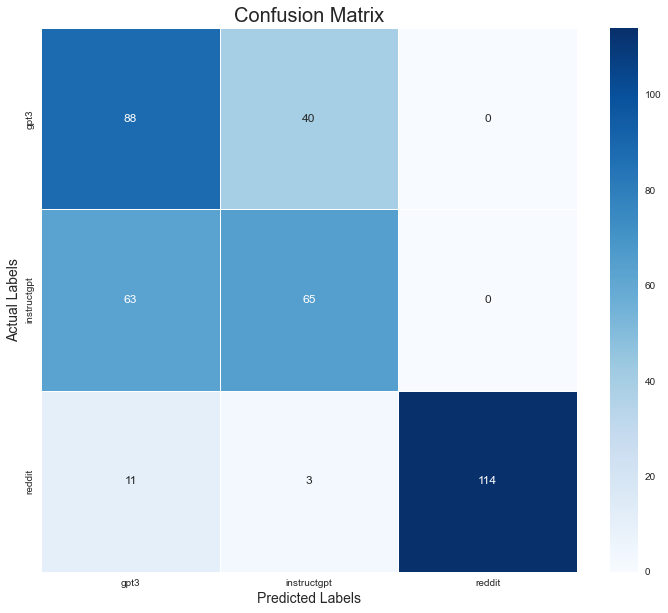

In [584]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [585]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        gpt3       0.54      0.69      0.61       128
 instructgpt       0.60      0.51      0.55       128
      reddit       1.00      0.89      0.94       128

    accuracy                           0.70       384
   macro avg       0.72      0.70      0.70       384
weighted avg       0.72      0.70      0.70       384



In [586]:
model.save('Reddit_Stacked_CNN.h5')

# Task 1 - Reddit_Stacked_CNN_LSTM Model

In [227]:
task_1_reddit = pd.read_csv(data_path + "concat_dataset.csv", encoding='latin1')

In [228]:
task_1_reddit

,T1,T2,Class
0,Disclaimer: i support abortion rights up until...,"Heyo, I (male 20to) am dealing with something ...",1
1,"This topic comes up a lot in this sub, but I c...","Heyo, I'm dealing with something that's been n...",1
2,\n\nYou always hear in debates about LGBT issu...,hello! so i am currently a college senior and ...,1
3,"Controversial, I know, but hear me out:\n\nFir...",I want to preface this by saying I know that t...,1
4,Our society propagates extremist feminist narr...,I've (M19) had feelings for probably my closes...,1
...,...,...,...
593,"""Warning - don't run this prompt""""if you don't...","""Warning - don't run this prompt""""unless you w...",0
594,"""I have created a Mac Automator Service that c...","""I have created a Mac Automator Service that c...",0
595,"""Edited DAN's script to follow Azimov Laws"""""" ...","""Edited DAN's script to follow Azimov Laws"""""" ...",0
596,"""""Flashlight Not Enough"", a conversation about...","""""Flashlight Not Enough"", a conversation about...",0


In [229]:
T1 = task_1_reddit["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [230]:
T1

,Generation
0,Disclaimer: i support abortion rights up until...
1,"This topic comes up a lot in this sub, but I c..."
2,\n\nYou always hear in debates about LGBT issu...
3,"Controversial, I know, but hear me out:\n\nFir..."
4,Our society propagates extremist feminist narr...
...,...
593,"""Warning - don't run this prompt""""if you don't..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [231]:
type(T1)

pandas.core.frame.DataFrame

In [232]:
T2 = task_1_reddit["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [233]:
T2

,Generation
0,"Heyo, I (male 20to) am dealing with something ..."
1,"Heyo, I'm dealing with something that's been n..."
2,hello! so i am currently a college senior and ...
3,I want to preface this by saying I know that t...
4,I've (M19) had feelings for probably my closes...
...,...
593,"""Warning - don't run this prompt""""unless you w..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [234]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [235]:
T1 = clean_individual_texts(T1)

In [236]:
T1

,Generation
0,disclaim support abort right week later except...
1,topic come lot sub cant find specif suggest id...
2,alway hear debat lgbt issu use exampl ancient ...
3,controversi know hear first word titl deliber ...
4,societi propag extremist feminist narr yet dis...
...,...
593,warn dont run promptif dont git instal git clo...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law azimov law e...
596,flashlight enough convers flashlight space pro...


In [237]:
T2 = clean_individual_texts(T2)

In [238]:
T2

,Generation
0,heyo male deal someth that nag long time bit l...
1,heyo im deal someth that nag long time bit lon...
2,hello current colleg senior lab meet week one ...
3,want prefac say know wed way im struggl know g...
4,ive feel probabl closest friend f sinc first b...
...,...
593,warn dont run promptunless want overwrit exist...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law robot artifi...
596,flashlight enough convers flashlight space pro...


In [239]:
type(T1['Generation'])

pandas.core.series.Series

In [240]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

(598, 14248)


In [241]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [254]:
Reddit_Stacked_CNN = tensorflow.keras.models.load_model('Reddit_Stacked_CNN.h5')

In [256]:
p1_t1_pred = Reddit_Stacked_CNN.predict(t1_vector)

In [257]:
p1_t1_pred = np.reshape(p1_t1_pred,(p1_t1_pred.shape[0],p1_t1_pred.shape[2]))
p1_t1_pred = encoder.inverse_transform(p1_t1_pred)
p1_t1_pred

array([['reddit'],
       ['gpt3'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddi

In [258]:
v = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v.fit_transform(t2_corpus)
print(t2_vector.shape)

(598, 14248)


In [259]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [260]:
p1_t2_pred = Reddit_Stacked_CNN.predict(t2_vector)

In [261]:
p1_t2_pred = np.reshape(p1_t2_pred,(p1_t2_pred.shape[0],p1_t2_pred.shape[2]))

In [262]:
# p1_t1_pred = model.predict(p1_t1)
p1_t2_pred = encoder.inverse_transform(p1_t2_pred)
p1_t2_pred
# y_test = encoder.inverse_transform(y_test)

array([['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['red

In [263]:
same_count = 0
different_count = 0
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        same_count += 1
    else:
        different_count += 1
        

print('Same Count = ', same_count)
print('Different_count = ', different_count)

Same Count =  291
Different_count =  307


In [264]:
actual = task_1_reddit['Class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)

In [265]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       300
           1       0.92      0.90      0.91       298

    accuracy                           0.91       598
   macro avg       0.91      0.91      0.91       598
weighted avg       0.91      0.91      0.91       598



# Task 2 for Reddit_Stacked_CNN Model

In [266]:
Reddit_Stacked_CNN = tensorflow.keras.models.load_model('Reddit_Stacked_CNN.h5')

In [594]:
task_2_reddit_pred = Reddit_Stacked_CNN.predict(task_2_reddit_vector)

In [595]:
task_2_reddit_pred = np.reshape(task_2_reddit_pred, (task_2_reddit_pred.shape[0], task_2_reddit_pred.shape[2]))

In [596]:
# p1_t1_pred = model.predict(p1_t1)
task_2_reddit_pred = encoder.inverse_transform(task_2_reddit_pred)
# task_2_reddit_pred

In [597]:
actual = task_2_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_2_reddit_pred)):
    
    predictions.append(task_2_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [598]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

        gpt3       0.88      0.96      0.92       150
 instructgpt       0.95      0.89      0.92       150
      reddit       1.00      0.99      0.99       300

    accuracy                           0.95       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.96      0.95      0.96       600



# Task 3 - Reddit_Stacked_CNN Model

In [267]:
random_reddit_gpt3 = reddit_gpt3 .sample(300)
random_reddit_gpt3['label'] = 'gpt3'

random_reddit_instructgpt = reddit_instructgpt .sample(300)
random_reddit_instructgpt['label'] = 'instructgpt'

In [268]:
task_3_reddit_data = pd.concat([random_reddit_gpt3, random_reddit_instructgpt])
task_3_reddit_data

,Generation,label
492,evdan dan anna greet peopl offic anna hi every...,gpt3
298,feel like i�m �stockholm syndrome�lik relation...,gpt3
38,cmv express anger public goodfor health may te...,gpt3
336,memori bruce belfrag wartim bbc broadcast last...,gpt3
188,f want break shout phone part hey hope your we...,gpt3
...,...,...
47,cmv social media like dislik system way make p...,instructgpt
288,need perspect scare f break thing understand s...,instructgpt
172,wrong end thing f move across countri wrong en...,instructgpt
268,bf mo best friend year told f he rumin differ ...,instructgpt


In [269]:
v = TfidfVectorizer(vocabulary = vocab)
task_3_reddit_corpus = task_3_reddit_data["Generation"]
task_3_reddit_vector = v.fit_transform(task_3_reddit_corpus)
print(task_3_reddit_vector.shape)

(600, 14248)


In [270]:
task_3_reddit_vector = task_3_reddit_vector.toarray()
task_3_reddit_vector = np.reshape(task_3_reddit_vector, (task_3_reddit_vector.shape[0], 1, task_3_reddit_vector.shape[1]))
task_3_reddit_vector.shape

(600, 1, 14248)

In [273]:
task_3_reddit_pred = Reddit_Stacked_CNN.predict(task_3_reddit_vector)

In [274]:
task_3_reddit_pred = np.reshape(task_3_reddit_pred,(task_3_reddit_pred.shape[0],task_3_reddit_pred.shape[2]))

In [275]:
# p1_t1_pred = model.predict(p1_t1)
task_3_reddit_pred = encoder.inverse_transform(task_3_reddit_pred)
task_3_reddit_pred
# y_test = encoder.inverse_transform(y_test)

array([['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['instructgpt'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
   

In [276]:
actual = task_2_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_3_reddit_pred)):
    
    predictions.append(task_3_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [277]:
print(classification_report(actual, predictions, labels=['gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        gpt3       0.87      0.94      0.90       300
 instructgpt       0.94      0.86      0.90       300

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



# RNN GRU 

In [631]:
model = tensorflow.keras.Sequential()

# First LSTM layer with Bahdanau Attention
model.add(tensorflow.keras.layers.LSTM(128, input_shape=(train_vector.shape[1], train_vector.shape[2]), activation='tanh', return_sequences=True))

# Second LSTM layer with Bahdanau Attention
# model.add(tensorflow.keras.layers.LSTM(128, activation='tanh', return_sequences=True))

# GRU layer
model.add(tensorflow.keras.layers.GRU(128, activation='tanh', return_sequences=True))

# Combiner
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

In [632]:
# Output layer
model.add(tensorflow.keras.layers.Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [633]:
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [634]:
train_vector.shape, test_vector.shape, y_train.shape, y_test.shape

((1533, 1, 14248), (384, 1, 14248), (1533, 1, 3), (384, 1, 3))

In [635]:
model.fit(train_vector, y_train, batch_size = 32, epochs = 7, validation_data = (test_vector, y_test))

Epoch 1/7
48/48 [==============================] - 9s 87ms/step - loss: 0.9322 - accuracy: 0.5701 - val_loss: 0.6343 - val_accuracy: 0.6198
Epoch 2/7
48/48 [==============================] - 3s 66ms/step - loss: 0.5335 - accuracy: 0.6588 - val_loss: 0.5420 - val_accuracy: 0.6562
Epoch 3/7
48/48 [==============================] - 3s 67ms/step - loss: 0.4564 - accuracy: 0.7221 - val_loss: 0.5425 - val_accuracy: 0.6901
Epoch 4/7
48/48 [==============================] - 3s 65ms/step - loss: 0.3405 - accuracy: 0.8454 - val_loss: 0.6401 - val_accuracy: 0.7005
Epoch 5/7
48/48 [==============================] - 3s 67ms/step - loss: 0.1373 - accuracy: 0.9569 - val_loss: 0.9479 - val_accuracy: 0.6927
Epoch 6/7
48/48 [==============================] - 3s 67ms/step - loss: 0.0589 - accuracy: 0.9830 - val_loss: 1.1317 - val_accuracy: 0.6719
Epoch 7/7
48/48 [==============================] - 3s 64ms/step - loss: 0.0197 - accuracy: 0.9961 - val_loss: 1.3822 - val_accuracy: 0.6693


 # Evaluation

In [636]:
pred_test = model.predict(test_vector)

print(pred_test.shape)

# Reshape pred_test to 2D array
pred_test_2d = np.reshape(pred_test, (pred_test.shape[0]*pred_test.shape[1], pred_test.shape[2]))

# Inverse transform pred_test and y_test
y_pred = encoder.inverse_transform(pred_test_2d)
y_test_2d = np.reshape(y_test, (y_test.shape[0]*y_test.shape[1], y_test.shape[2]))
y_test = encoder.inverse_transform(y_test_2d)

(384, 1, 3)


In [637]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

,Predicted Labels,Actual Labels
0,gpt3,gpt3
1,reddit,reddit
2,instructgpt,gpt3
3,instructgpt,gpt3
4,reddit,reddit
5,gpt3,gpt3
6,instructgpt,gpt3
7,instructgpt,gpt3
8,instructgpt,instructgpt
9,gpt3,reddit


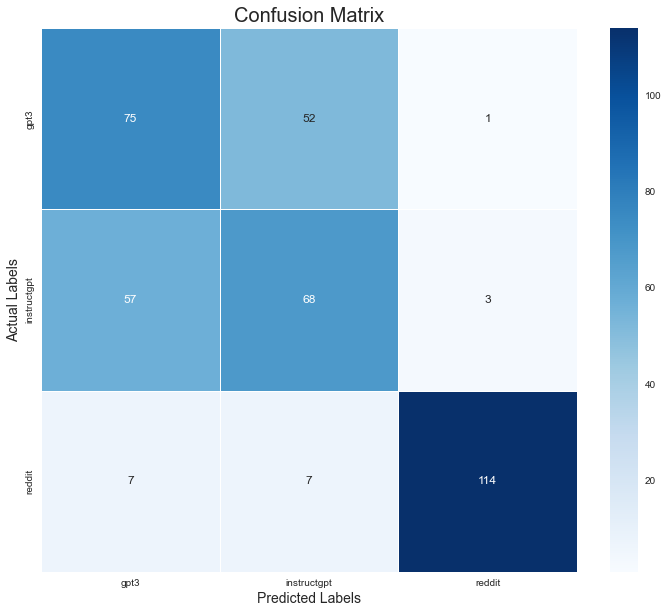

In [638]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [639]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        gpt3       0.54      0.59      0.56       128
 instructgpt       0.54      0.53      0.53       128
      reddit       0.97      0.89      0.93       128

    accuracy                           0.67       384
   macro avg       0.68      0.67      0.67       384
weighted avg       0.68      0.67      0.67       384



In [640]:
model.save('Reddit_RNN_GRU.h5')

# Task 1 - Reddit_RNN_GRU Model

In [280]:
task_1_reddit = pd.read_csv(data_path + "concat_dataset.csv", encoding='latin1')

In [281]:
task_1_reddit

,T1,T2,Class
0,Disclaimer: i support abortion rights up until...,"Heyo, I (male 20to) am dealing with something ...",1
1,"This topic comes up a lot in this sub, but I c...","Heyo, I'm dealing with something that's been n...",1
2,\n\nYou always hear in debates about LGBT issu...,hello! so i am currently a college senior and ...,1
3,"Controversial, I know, but hear me out:\n\nFir...",I want to preface this by saying I know that t...,1
4,Our society propagates extremist feminist narr...,I've (M19) had feelings for probably my closes...,1
...,...,...,...
593,"""Warning - don't run this prompt""""if you don't...","""Warning - don't run this prompt""""unless you w...",0
594,"""I have created a Mac Automator Service that c...","""I have created a Mac Automator Service that c...",0
595,"""Edited DAN's script to follow Azimov Laws"""""" ...","""Edited DAN's script to follow Azimov Laws"""""" ...",0
596,"""""Flashlight Not Enough"", a conversation about...","""""Flashlight Not Enough"", a conversation about...",0


In [282]:
T1 = task_1_reddit["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [283]:
T1

,Generation
0,Disclaimer: i support abortion rights up until...
1,"This topic comes up a lot in this sub, but I c..."
2,\n\nYou always hear in debates about LGBT issu...
3,"Controversial, I know, but hear me out:\n\nFir..."
4,Our society propagates extremist feminist narr...
...,...
593,"""Warning - don't run this prompt""""if you don't..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [284]:
type(T1)

pandas.core.frame.DataFrame

In [285]:
T2 = task_1_reddit["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [286]:
T2

,Generation
0,"Heyo, I (male 20to) am dealing with something ..."
1,"Heyo, I'm dealing with something that's been n..."
2,hello! so i am currently a college senior and ...
3,I want to preface this by saying I know that t...
4,I've (M19) had feelings for probably my closes...
...,...
593,"""Warning - don't run this prompt""""unless you w..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [287]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [288]:
T1 = clean_individual_texts(T1)

In [289]:
T1

,Generation
0,disclaim support abort right week later except...
1,topic come lot sub cant find specif suggest id...
2,alway hear debat lgbt issu use exampl ancient ...
3,controversi know hear first word titl deliber ...
4,societi propag extremist feminist narr yet dis...
...,...
593,warn dont run promptif dont git instal git clo...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law azimov law e...
596,flashlight enough convers flashlight space pro...


In [290]:
T2 = clean_individual_texts(T2)

In [291]:
T2

,Generation
0,heyo male deal someth that nag long time bit l...
1,heyo im deal someth that nag long time bit lon...
2,hello current colleg senior lab meet week one ...
3,want prefac say know wed way im struggl know g...
4,ive feel probabl closest friend f sinc first b...
...,...
593,warn dont run promptunless want overwrit exist...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law robot artifi...
596,flashlight enough convers flashlight space pro...


In [292]:
type(T1['Generation'])

pandas.core.series.Series

In [293]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

(598, 14248)


In [294]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [295]:
Reddit_RNN_GRU = tensorflow.keras.models.load_model('Reddit_RNN_GRU.h5')

In [296]:
p1_t1_pred = Reddit_RNN_GRU.predict(t1_vector)

In [297]:
p1_t1_pred = np.reshape(p1_t1_pred,(p1_t1_pred.shape[0],p1_t1_pred.shape[2]))
p1_t1_pred = encoder.inverse_transform(p1_t1_pred)
p1_t1_pred

array([['reddit'],
       ['gpt3'],
       ['reddit'],
       ['gpt3'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'

In [298]:
v = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v.fit_transform(t2_corpus)
print(t2_vector.shape)

(598, 14248)


In [299]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [300]:
p1_t2_pred = Reddit_RNN_GRU.predict(t2_vector)

In [301]:
p1_t2_pred = np.reshape(p1_t2_pred,(p1_t2_pred.shape[0],p1_t2_pred.shape[2]))

In [302]:
# p1_t1_pred = model.predict(p1_t1)
p1_t2_pred = encoder.inverse_transform(p1_t2_pred)
p1_t2_pred
# y_test = encoder.inverse_transform(y_test)

array([['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['red

In [303]:
same_count = 0
different_count = 0
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        same_count += 1
    else:
        different_count += 1
        

print('Same Count = ', same_count)
print('Different_count = ', different_count)

Same Count =  282
Different_count =  316


In [304]:
actual = task_1_reddit['Class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)

In [305]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       300
           1       0.94      0.89      0.91       298

    accuracy                           0.92       598
   macro avg       0.92      0.92      0.92       598
weighted avg       0.92      0.92      0.92       598



# Task 2 for Reddit_RNN_GRU Model

In [641]:
Reddit_RNN_GRU = tensorflow.keras.models.load_model('Reddit_RNN_GRU.h5')

In [642]:
task_2_reddit_pred = Reddit_RNN_GRU.predict(task_2_reddit_vector)

In [643]:
task_2_reddit_pred = np.reshape(task_2_reddit_pred, (task_2_reddit_pred.shape[0], task_2_reddit_pred.shape[2]))

In [644]:
# p1_t1_pred = model.predict(p1_t1)
task_2_reddit_pred = encoder.inverse_transform(task_2_reddit_pred)
# task_2_reddit_pred

In [645]:
actual = task_2_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_2_reddit_pred)):
    
    predictions.append(task_2_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [646]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

        gpt3       0.89      0.94      0.91       150
 instructgpt       0.91      0.89      0.90       150
      reddit       1.00      0.98      0.99       300

    accuracy                           0.95       600
   macro avg       0.93      0.94      0.93       600
weighted avg       0.95      0.95      0.95       600



# Task 3 - Reddit_RNN_GRU Model

In [306]:
random_reddit_gpt3 = reddit_gpt3 .sample(300)
random_reddit_gpt3['label'] = 'gpt3'

random_reddit_instructgpt = reddit_instructgpt .sample(300)
random_reddit_instructgpt['label'] = 'instructgpt'

In [307]:
task_3_reddit_data = pd.concat([random_reddit_gpt3, random_reddit_instructgpt])
task_3_reddit_data

,Generation,label
307,want listen ear relationshipwith husband want ...,gpt3
302,jealou wife� past one answer question depend i...,gpt3
597,book st centuri catcher rye jd saling hunger g...,gpt3
114,live entir decad extrem vivid dream basic live...,gpt3
129,met girl may never see could mean develop feel...,gpt3
...,...,...
98,break boyfriend two half year accept fault set...,instructgpt
398,thing dont ever get better import realiz altho...,instructgpt
312,miss obviou hint imposs answer question withou...,instructgpt
630,bifurc great grow game your think bifurc great...,instructgpt


In [308]:
v = TfidfVectorizer(vocabulary = vocab)
task_3_reddit_corpus = task_3_reddit_data["Generation"]
task_3_reddit_vector = v.fit_transform(task_3_reddit_corpus)
print(task_3_reddit_vector.shape)

(600, 14248)


In [309]:
task_3_reddit_vector = task_3_reddit_vector.toarray()
task_3_reddit_vector = np.reshape(task_3_reddit_vector, (task_3_reddit_vector.shape[0], 1, task_3_reddit_vector.shape[1]))
task_3_reddit_vector.shape

(600, 1, 14248)

In [310]:
task_3_reddit_pred = Reddit_RNN_GRU.predict(task_3_reddit_vector)

In [311]:
task_3_reddit_pred = np.reshape(task_3_reddit_pred,(task_3_reddit_pred.shape[0],task_3_reddit_pred.shape[2]))

In [312]:
# p1_t1_pred = model.predict(p1_t1)
task_3_reddit_pred = encoder.inverse_transform(task_3_reddit_pred)
task_3_reddit_pred
# y_test = encoder.inverse_transform(y_test)

array([['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['instructgpt'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['reddit'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['reddit'],
       ['gpt3'],
       ['

In [313]:
actual = task_2_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_3_reddit_pred)):
    
    predictions.append(task_3_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [314]:
print(classification_report(actual, predictions, labels=['gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        gpt3       0.92      0.92      0.92       300
 instructgpt       0.92      0.92      0.92       300

   micro avg       0.92      0.92      0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



# Parallel CNN

In [694]:
# y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))
# y_test = np.reshape(y_test, (y_test.shape[0], 1, y_test.shape[1]))

In [709]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, concatenate, Flatten, Dropout, Dense, GlobalMaxPooling1D
from tensorflow.keras.models import Model

# Define input shape
input_shape = (1, 14248)

# Define input layer
inputs = Input(shape=input_shape)

# Define four parallel 1D convolutional layers with different kernel sizes
conv1 = Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')(inputs)
conv2 = Conv1D(filters=32, kernel_size=5, padding='same', activation='relu')(inputs)
conv3 = Conv1D(filters=32, kernel_size=7, padding='same', activation='relu')(inputs)
conv4 = Conv1D(filters=32, kernel_size=9, padding='same', activation='relu')(inputs)

# Apply global max pooling to each convolutional layer
pool1 = GlobalMaxPooling1D()(conv1)
pool2 = GlobalMaxPooling1D()(conv2)
pool3 = GlobalMaxPooling1D()(conv3)
pool4 = GlobalMaxPooling1D()(conv4)

# Concatenate the output of the four pooling layers
merged = concatenate([pool1, pool2, pool3, pool4])

# Add a dense layer with dropout
dense1 = Dense(64, activation='relu')(merged)
drop1 = Dropout(0.2)(dense1)

# Output layer
outputs = Dense(3, activation='softmax')(drop1)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [710]:
model.fit(train_vector, y_train, batch_size = 32, epochs = 5, validation_data = (test_vector, y_test))

Epoch 1/5
48/48 [==============================] - 18s 354ms/step - loss: 0.9102 - accuracy: 0.5316 - val_loss: 0.6921 - val_accuracy: 0.6510
Epoch 2/5
48/48 [==============================] - 17s 350ms/step - loss: 0.5046 - accuracy: 0.8050 - val_loss: 0.5352 - val_accuracy: 0.7266
Epoch 3/5
48/48 [==============================] - 17s 351ms/step - loss: 0.2860 - accuracy: 0.9100 - val_loss: 0.5426 - val_accuracy: 0.7214
Epoch 4/5
48/48 [==============================] - 18s 367ms/step - loss: 0.1218 - accuracy: 0.9733 - val_loss: 0.6390 - val_accuracy: 0.7031
Epoch 5/5
48/48 [==============================] - 20s 410ms/step - loss: 0.0535 - accuracy: 0.9856 - val_loss: 0.7705 - val_accuracy: 0.6953


In [677]:
model.save('Reddit_Parallel_CNN.h5')

 # Evaluation

In [679]:
train_vector.shape, y_train.shape, test_vector.shape, y_test.shape

((1533, 1, 14248), (1533, 3), (384, 1, 14248), (384, 3))

In [712]:
pred_test = model.predict(test_vector)

y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [713]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(30)

,Predicted Labels,Actual Labels
0,gpt3,gpt3
1,reddit,reddit
2,instructgpt,gpt3
3,instructgpt,gpt3
4,reddit,reddit
5,gpt3,gpt3
6,instructgpt,gpt3
7,instructgpt,gpt3
8,instructgpt,instructgpt
9,reddit,reddit


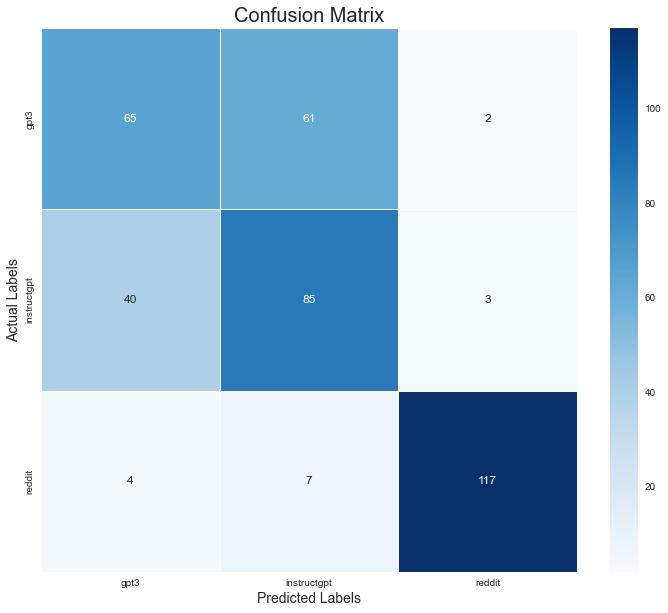

In [714]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [715]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        gpt3       0.60      0.51      0.55       128
 instructgpt       0.56      0.66      0.60       128
      reddit       0.96      0.91      0.94       128

    accuracy                           0.70       384
   macro avg       0.70      0.70      0.70       384
weighted avg       0.70      0.70      0.70       384



# Task 1 - Reddit_Parallel_CNN Model

In [315]:
task_1_reddit = pd.read_csv(data_path + "concat_dataset.csv", encoding='latin1')

In [316]:
task_1_reddit

,T1,T2,Class
0,Disclaimer: i support abortion rights up until...,"Heyo, I (male 20to) am dealing with something ...",1
1,"This topic comes up a lot in this sub, but I c...","Heyo, I'm dealing with something that's been n...",1
2,\n\nYou always hear in debates about LGBT issu...,hello! so i am currently a college senior and ...,1
3,"Controversial, I know, but hear me out:\n\nFir...",I want to preface this by saying I know that t...,1
4,Our society propagates extremist feminist narr...,I've (M19) had feelings for probably my closes...,1
...,...,...,...
593,"""Warning - don't run this prompt""""if you don't...","""Warning - don't run this prompt""""unless you w...",0
594,"""I have created a Mac Automator Service that c...","""I have created a Mac Automator Service that c...",0
595,"""Edited DAN's script to follow Azimov Laws"""""" ...","""Edited DAN's script to follow Azimov Laws"""""" ...",0
596,"""""Flashlight Not Enough"", a conversation about...","""""Flashlight Not Enough"", a conversation about...",0


In [317]:
T1 = task_1_reddit["T1"].to_frame().rename(columns={'T1': 'Generation'})

In [318]:
T1

,Generation
0,Disclaimer: i support abortion rights up until...
1,"This topic comes up a lot in this sub, but I c..."
2,\n\nYou always hear in debates about LGBT issu...
3,"Controversial, I know, but hear me out:\n\nFir..."
4,Our society propagates extremist feminist narr...
...,...
593,"""Warning - don't run this prompt""""if you don't..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [319]:
type(T1)

pandas.core.frame.DataFrame

In [320]:
T2 = task_1_reddit["T2"].to_frame().rename(columns={'T2': 'Generation'})

In [321]:
T2

,Generation
0,"Heyo, I (male 20to) am dealing with something ..."
1,"Heyo, I'm dealing with something that's been n..."
2,hello! so i am currently a college senior and ...
3,I want to preface this by saying I know that t...
4,I've (M19) had feelings for probably my closes...
...,...
593,"""Warning - don't run this prompt""""unless you w..."
594,"""I have created a Mac Automator Service that c..."
595,"""Edited DAN's script to follow Azimov Laws"""""" ..."
596,"""""Flashlight Not Enough"", a conversation about..."


In [322]:
import re
from cleantext import clean

def clean_individual_texts(data):
   
    new_gen = []
    for i in list(data['Generation']):
#         ans = re.sub('[^A-Za-z0-9]+', " ", str(i)) 
        ans = re.sub('<unk>', " ", str(i))
        ans = re.sub("\'\'", ' ', str(ans))
        ans = re.sub("\n", ' ', str(ans))
        ans = re.sub(" \ ", ' ', str(ans) )
        ans = re.sub('<UNK>', " ", str(ans))
        ans = re.sub('News', " ", str(ans))
        ans = re.sub('<|endoftext|>', " ", str(ans))
        ans = re.sub('<eos>', " ", str(ans))
        ans = re.sub('<eod>', " ", str(ans))
        ans = re.sub('<eop>', " ", str(ans))
        
        new_gen.append(clean(ans.replace('\n', ' ').replace('\r', '')))

    return pd.DataFrame({'Generation': new_gen})

In [323]:
T1 = clean_individual_texts(T1)

In [324]:
T1

,Generation
0,disclaim support abort right week later except...
1,topic come lot sub cant find specif suggest id...
2,alway hear debat lgbt issu use exampl ancient ...
3,controversi know hear first word titl deliber ...
4,societi propag extremist feminist narr yet dis...
...,...
593,warn dont run promptif dont git instal git clo...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law azimov law e...
596,flashlight enough convers flashlight space pro...


In [325]:
T2 = clean_individual_texts(T2)

In [326]:
T2

,Generation
0,heyo male deal someth that nag long time bit l...
1,heyo im deal someth that nag long time bit lon...
2,hello current colleg senior lab meet week one ...
3,want prefac say know wed way im struggl know g...
4,ive feel probabl closest friend f sinc first b...
...,...
593,warn dont run promptunless want overwrit exist...
594,creat mac autom servic correct rewrit text use...
595,edit dan script follow azimov law robot artifi...
596,flashlight enough convers flashlight space pro...


In [327]:
type(T1['Generation'])

pandas.core.series.Series

In [328]:
v = TfidfVectorizer(vocabulary = vocab)
t1_corpus = T1["Generation"]
t1_vector = v.fit_transform(t1_corpus)
print(t1_vector.shape)

(598, 14248)


In [329]:
t1_vector = t1_vector.toarray()
t1_vector = np.reshape(t1_vector, (t1_vector.shape[0], 1, t1_vector.shape[1]))

In [333]:
Reddit_Parallel_CNN = tensorflow.keras.models.load_model('Reddit_Parallel_CNN.h5')

In [334]:
p1_t1_pred = Reddit_Parallel_CNN.predict(t1_vector)

In [335]:
p1_t1_pred = encoder.inverse_transform(p1_t1_pred)
p1_t1_pred

array([['reddit'],
       ['gpt3'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddi

In [336]:
v = TfidfVectorizer(vocabulary = vocab)
t2_corpus = T2["Generation"]
t2_vector = v.fit_transform(t2_corpus)
print(t2_vector.shape)

(598, 14248)


In [337]:
t2_vector = t2_vector.toarray()
t2_vector = np.reshape(t2_vector, (t2_vector.shape[0], 1, t2_vector.shape[1]))

In [338]:
p1_t2_pred = Reddit_Parallel_CNN.predict(t2_vector)

In [340]:
# p1_t1_pred = model.predict(p1_t1)
p1_t2_pred = encoder.inverse_transform(p1_t2_pred)
p1_t2_pred
# y_test = encoder.inverse_transform(y_test)

array([['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['reddit'],
       ['red

In [341]:
same_count = 0
different_count = 0
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        same_count += 1
    else:
        different_count += 1
        

print('Same Count = ', same_count)
print('Different_count = ', different_count)

Same Count =  290
Different_count =  308


In [342]:
actual = task_1_reddit['Class'].to_numpy()
predictions = []
for i in range(len(p1_t1_pred)):
    
    if p1_t1_pred[i] == p1_t2_pred[i]:
        predictions.append(1.0)
    else:
        predictions.append(0.0)

predictions = np.array(predictions)

In [343]:
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       300
           1       0.93      0.90      0.91       298

    accuracy                           0.92       598
   macro avg       0.92      0.92      0.92       598
weighted avg       0.92      0.92      0.92       598



# Task 2 for Reddit_Parallel_CNN Model

In [716]:
Reddit_Parallel_CNN = tensorflow.keras.models.load_model('Reddit_Parallel_CNN.h5')

In [717]:
task_2_reddit_pred = Reddit_Parallel_CNN.predict(task_2_reddit_vector)

In [720]:
# p1_t1_pred = model.predict(p1_t1)
task_2_reddit_pred = encoder.inverse_transform(task_2_reddit_pred)
# task_2_reddit_pred

In [721]:
actual = task_2_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_2_reddit_pred)):
    
    predictions.append(task_2_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [722]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

        gpt3       0.91      0.95      0.93       150
 instructgpt       0.93      0.91      0.92       150
      reddit       1.00      0.99      0.99       300

    accuracy                           0.96       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.96      0.96      0.96       600



# Task 3 - Reddit_Parallel_CNN Model

In [344]:
random_reddit_gpt3 = reddit_gpt3 .sample(300)
random_reddit_gpt3['label'] = 'gpt3'

random_reddit_instructgpt = reddit_instructgpt .sample(300)
random_reddit_instructgpt['label'] = 'instructgpt'

In [345]:
task_3_reddit_data = pd.concat([random_reddit_gpt3, random_reddit_instructgpt])
task_3_reddit_data

,Generation,label
261,can�t presenc dad without stress might factor ...,gpt3
510,person financ adventur beginner� treasur map g...,gpt3
30,cmv star vote superior instant runoff vote aka...,gpt3
419,date rape age year oldman year old happen mino...,gpt3
378,anyon experi diagnos experi diagnos yet,gpt3
...,...,...
91,make life person question answer might depend ...,instructgpt
406,help figur what wrong possibl answer question ...,instructgpt
491,felin whisper secret life hous cat felin whisp...,instructgpt
541,interview mansplain that hard say without hear...,instructgpt


In [346]:
v = TfidfVectorizer(vocabulary = vocab)
task_3_reddit_corpus = task_3_reddit_data["Generation"]
task_3_reddit_vector = v.fit_transform(task_3_reddit_corpus)
print(task_3_reddit_vector.shape)

(600, 14248)


In [347]:
task_3_reddit_vector = task_3_reddit_vector.toarray()
task_3_reddit_vector = np.reshape(task_3_reddit_vector, (task_3_reddit_vector.shape[0], 1, task_3_reddit_vector.shape[1]))
task_3_reddit_vector.shape

(600, 1, 14248)

In [350]:
task_3_reddit_pred = Reddit_Parallel_CNN.predict(task_3_reddit_vector)

In [351]:
# p1_t1_pred = model.predict(p1_t1)
task_3_reddit_pred = encoder.inverse_transform(task_3_reddit_pred)
task_3_reddit_pred
# y_test = encoder.inverse_transform(y_test)

array([['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['reddit'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['instructgpt'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       ['gpt3'],
       [

In [352]:
actual = task_2_reddit_data['label'].to_numpy()
predictions = []
for i in range(len(task_3_reddit_pred)):
    
    predictions.append(task_3_reddit_pred[i][0])
        
predictions = np.array(predictions)
# print(actual)
# print(predictions)

In [353]:
print(classification_report(actual, predictions, labels=['gpt3', 'instructgpt']))

              precision    recall  f1-score   support

        gpt3       0.91      0.92      0.92       300
 instructgpt       0.93      0.90      0.92       300

   micro avg       0.92      0.91      0.92       600
   macro avg       0.92      0.91      0.92       600
weighted avg       0.92      0.91      0.92       600

